In [1]:
library(PATH)
library(expm)
library(ggplot2)
library(ggtree)
library(ggtreeExtra)
library(tidytree)
library(Matrix)
library(patchwork)

options(digits = 2)
library(ComplexHeatmap)
library(grid)
library(viridis)

Loading required package: Matrix


Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm


ggtree v3.10.1 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu.  Data Integration, Manipulation and Visualization of
Phylogenetic Trees (1st edition). Chapman and Hall/CRC. 2022,
doi:10.1201/9781003279242

Guangchuang Yu. Using ggtree to visualize data on tree-like structures.
Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96



Attaching package: ‘ggtree’


The following object is masked from ‘package:Matrix’:

    expand


ggtreeExtra v1.12.0 For help: h

In [2]:
metadata <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/metadata.T1_T2_T3a.harmony.final.refine.csv',sep=',',header=T,row.names=1)
rownames(metadata) <- metadata$cellName
unique(metadata$seurat_clusters_rename)

[1] 2 1 3 4 5

# T1

In [7]:
treefiles <- grep('treefile',list.files('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T1'),value = T)

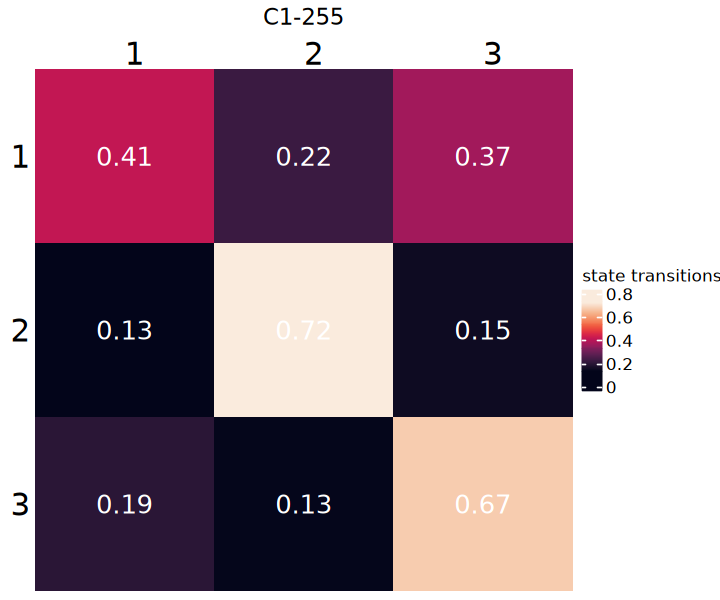

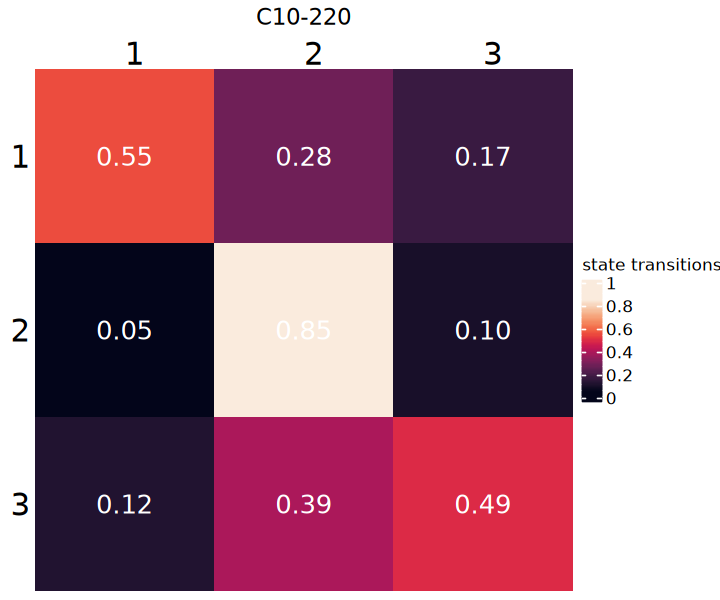

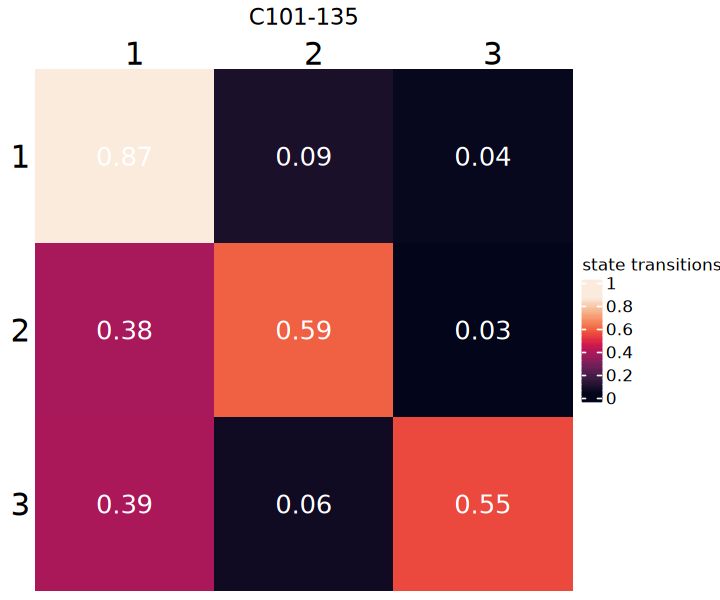

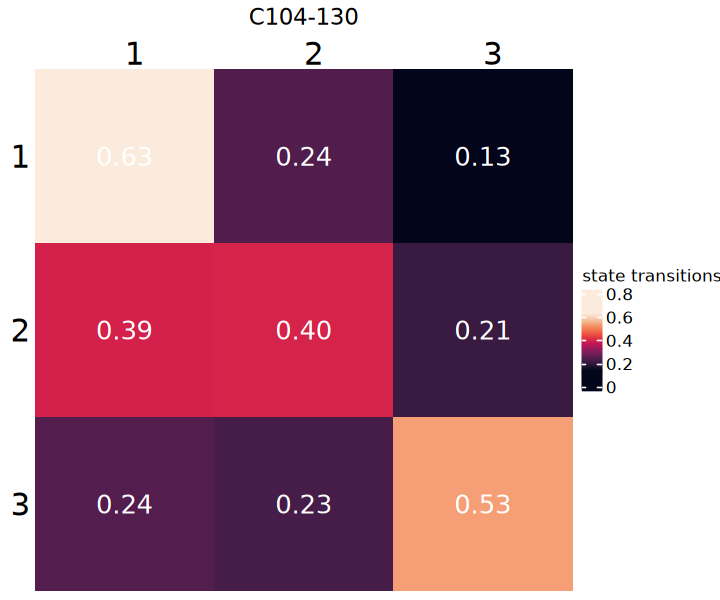

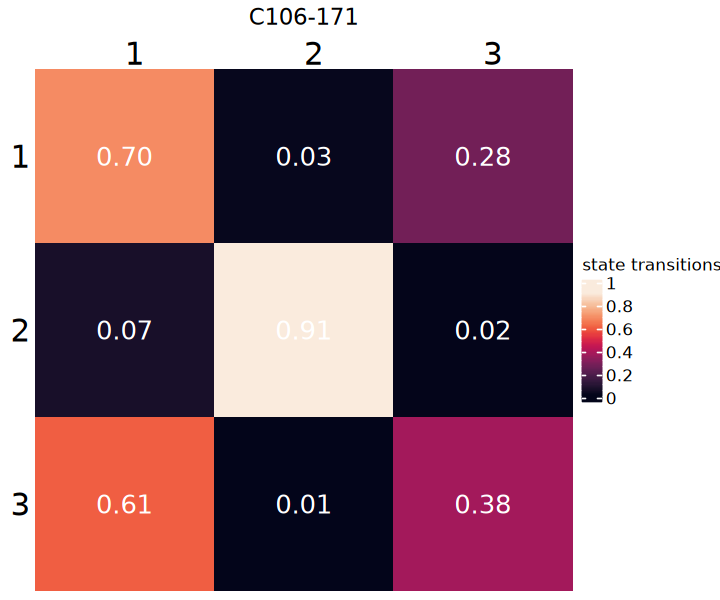

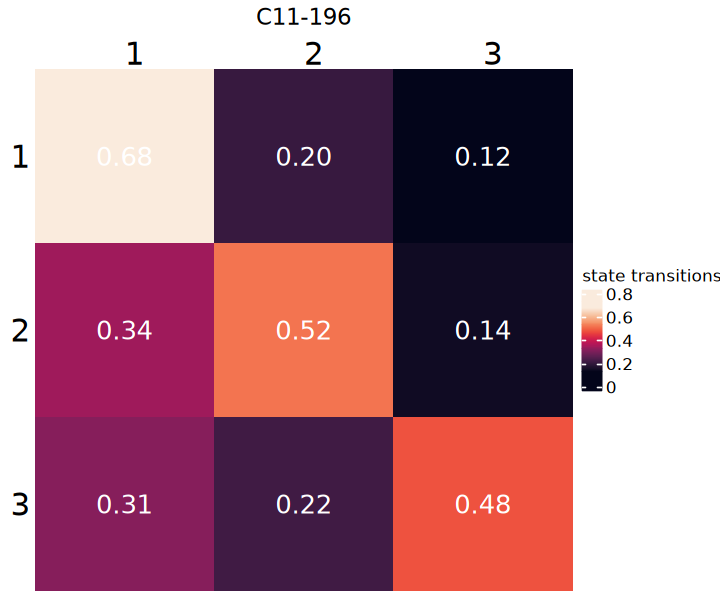

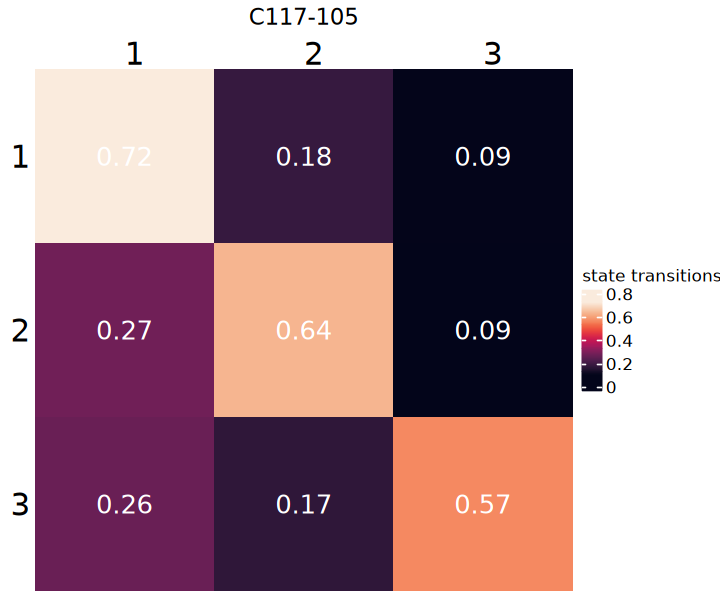

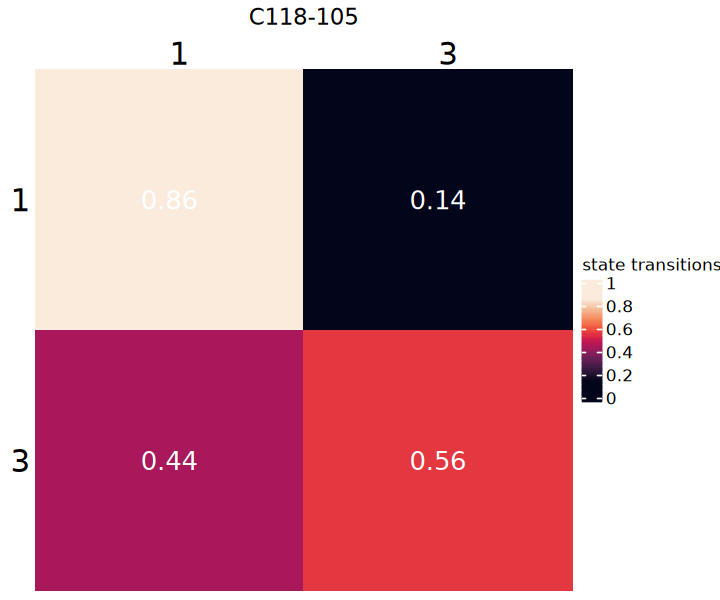

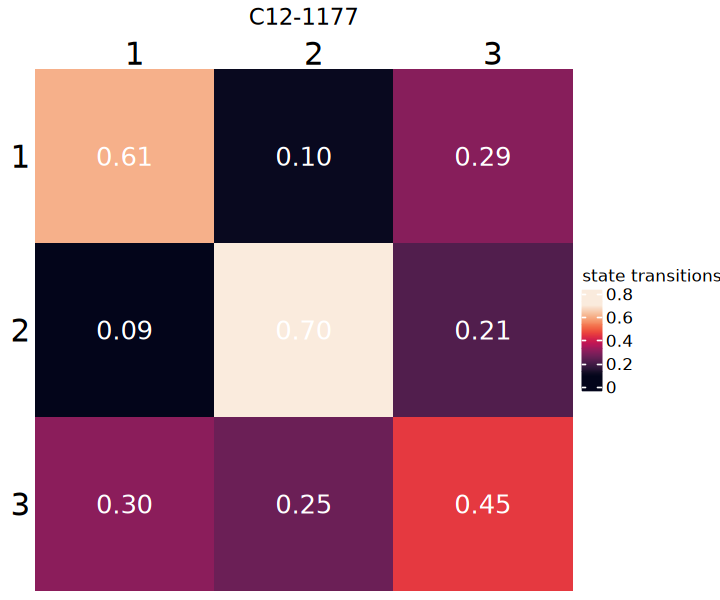

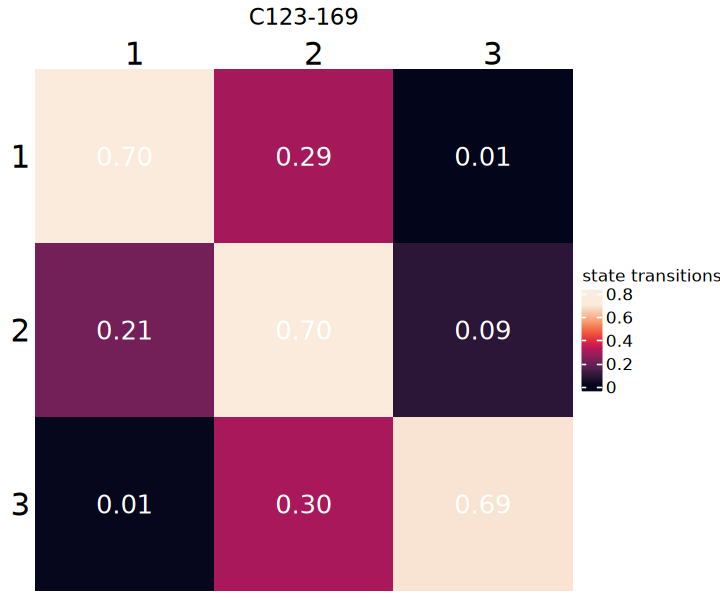

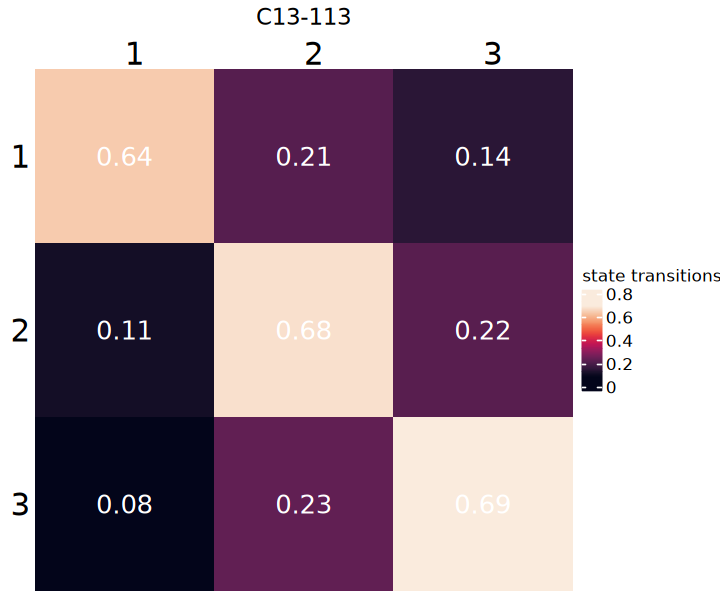

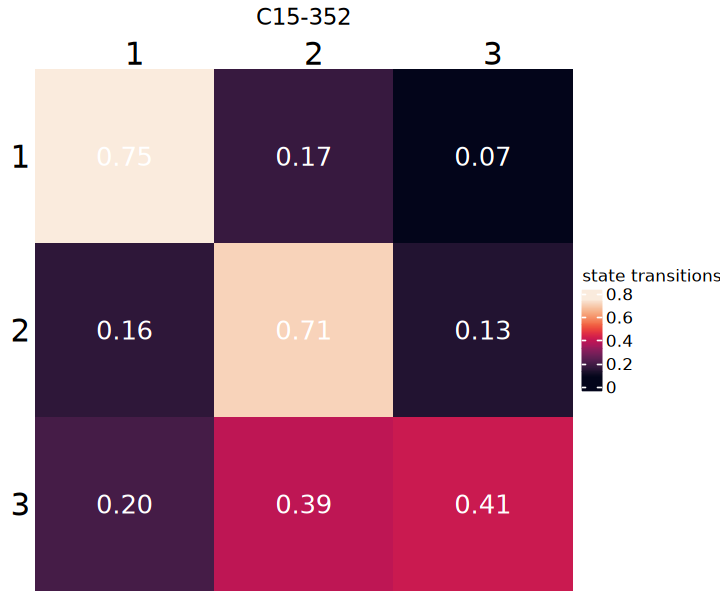

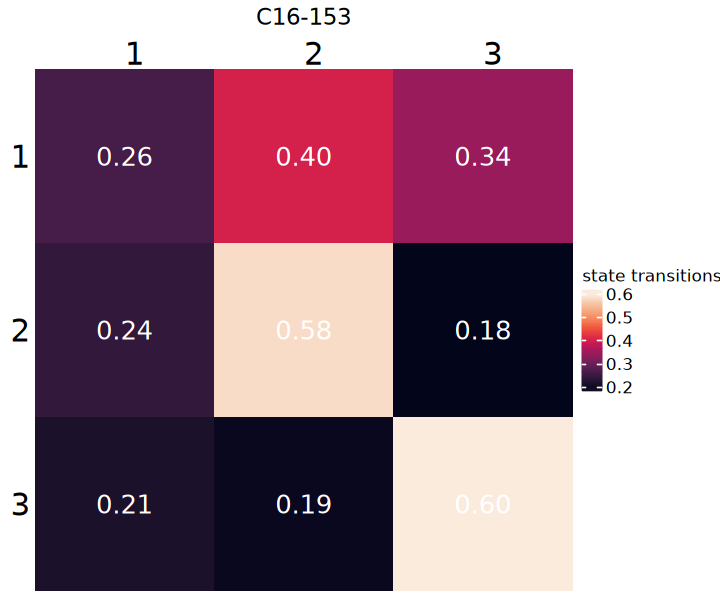

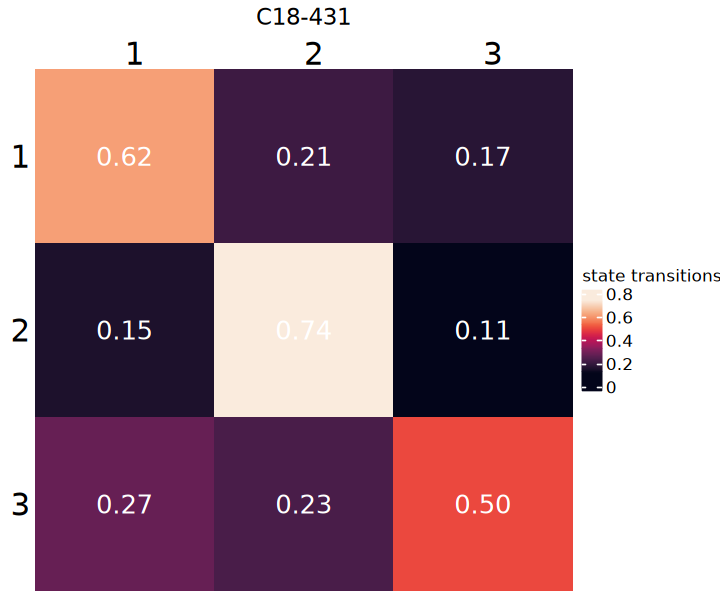

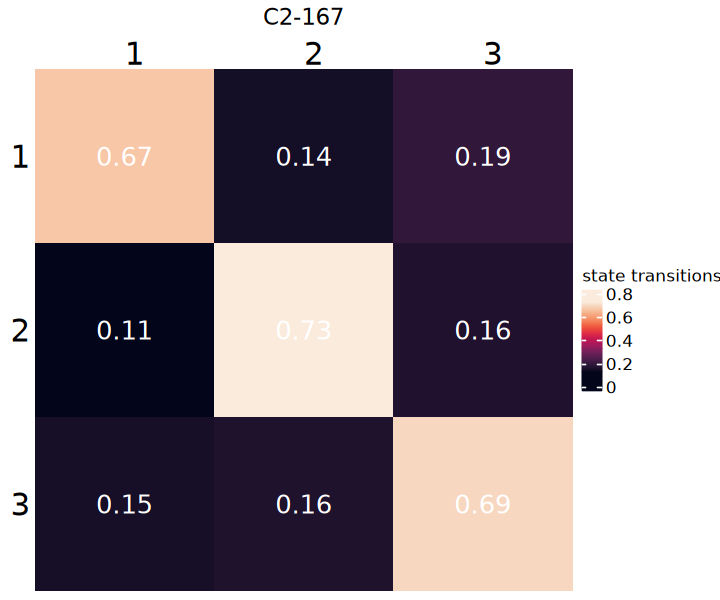

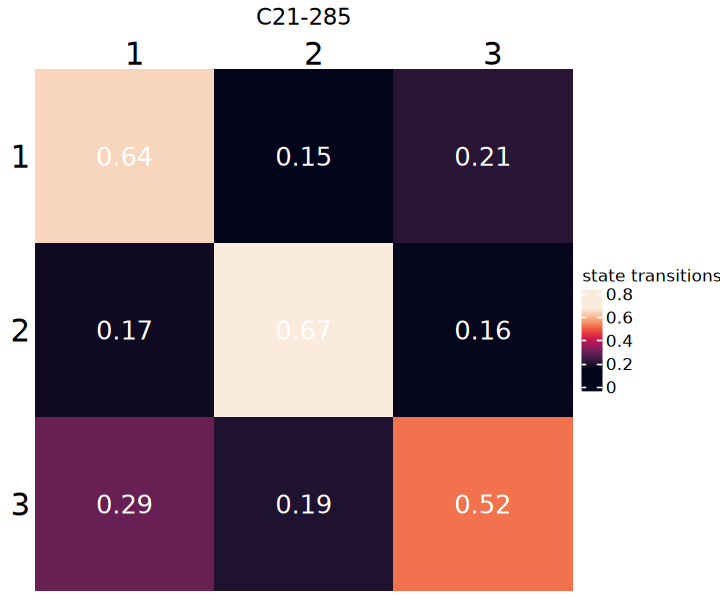

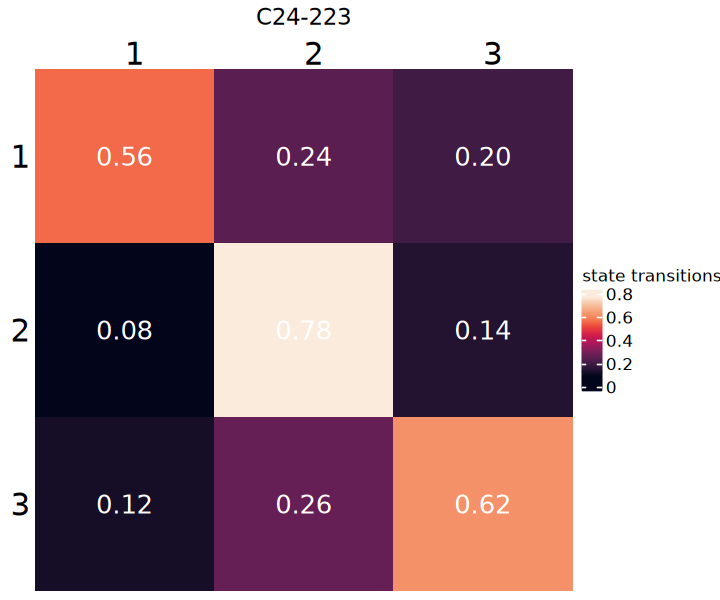

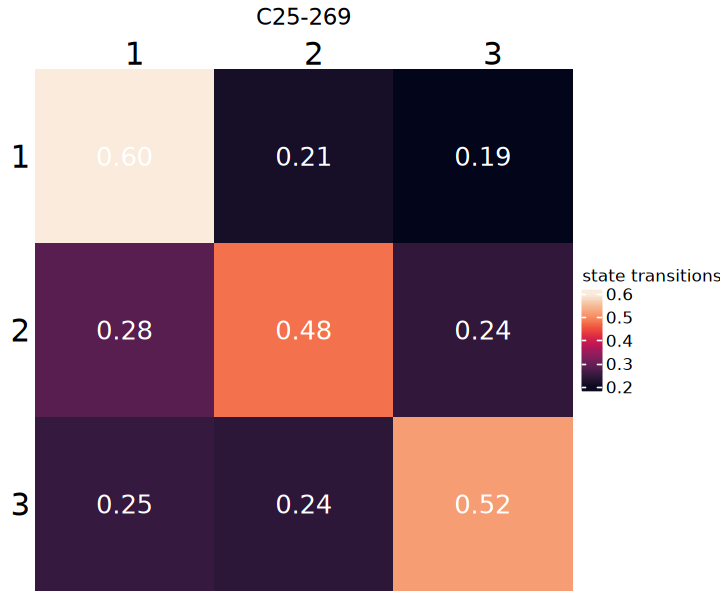

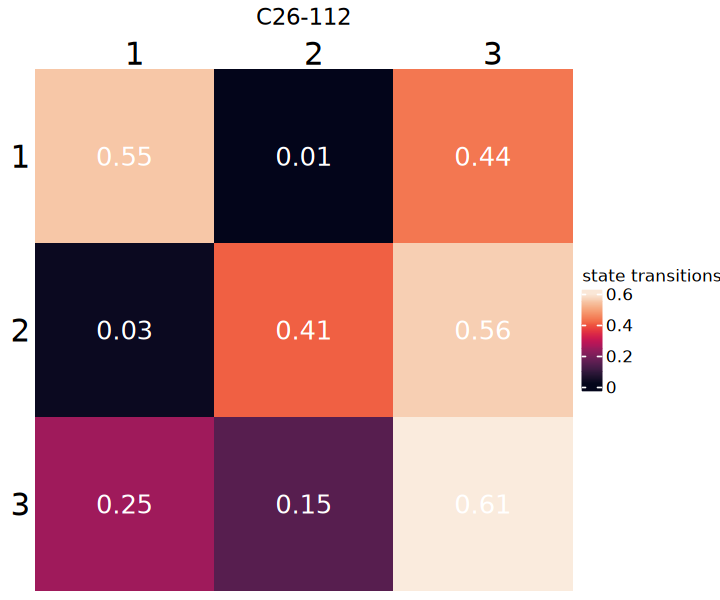

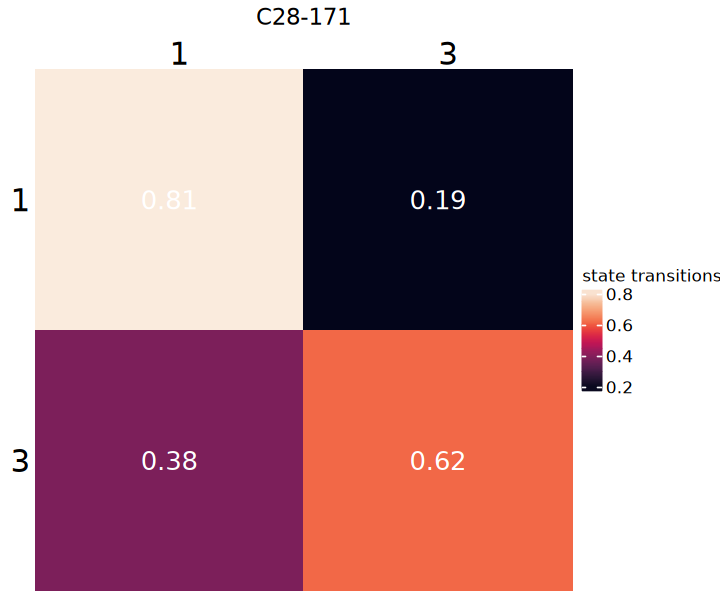

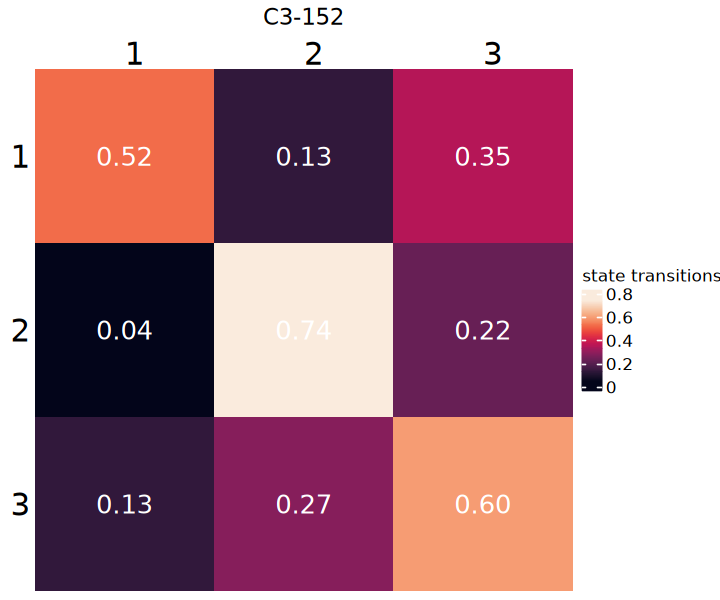

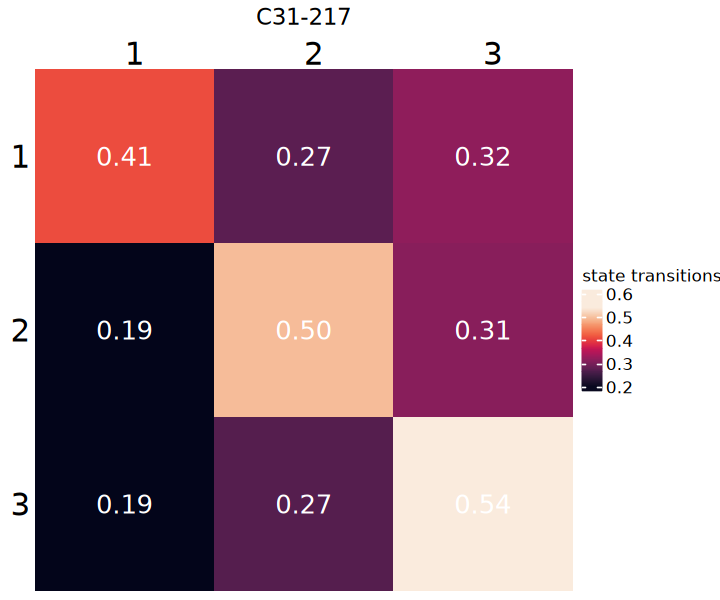

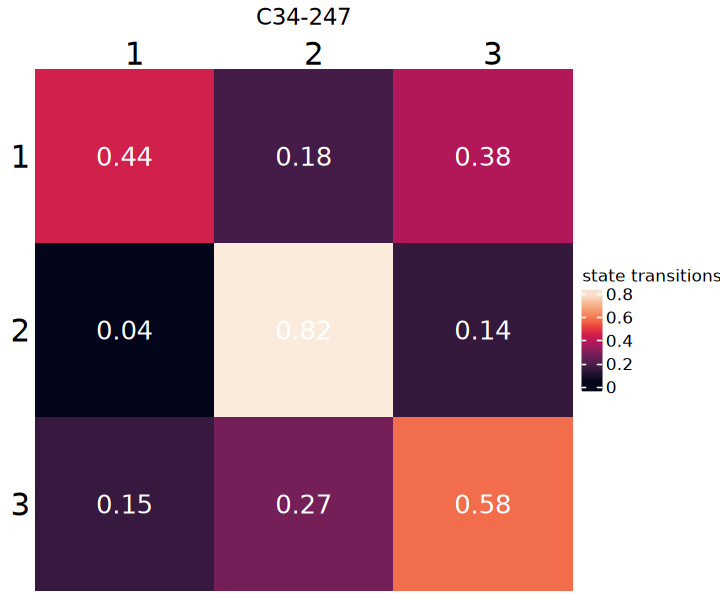

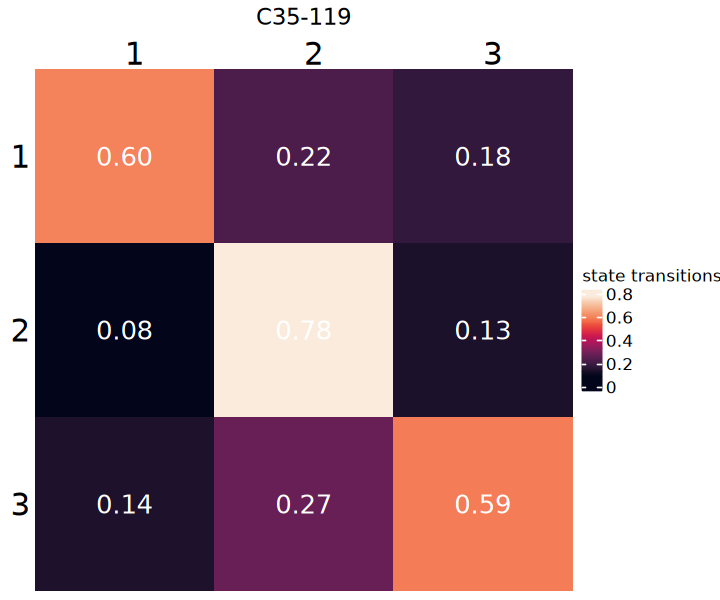

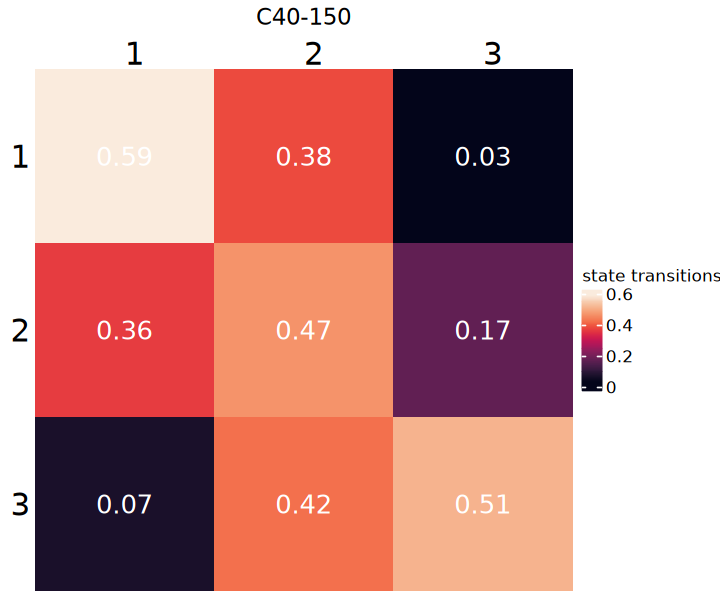

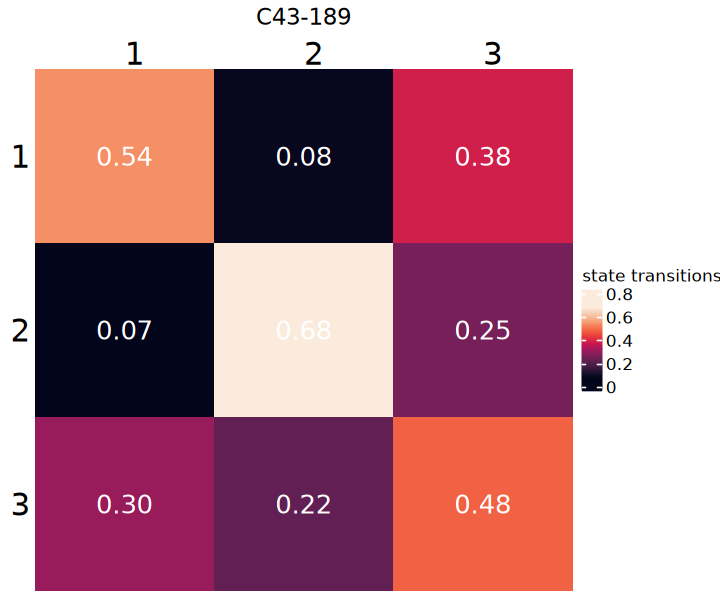

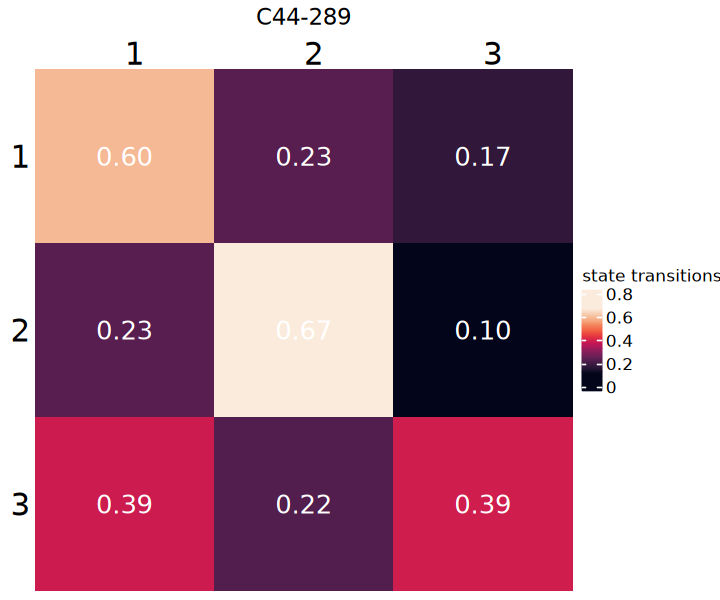

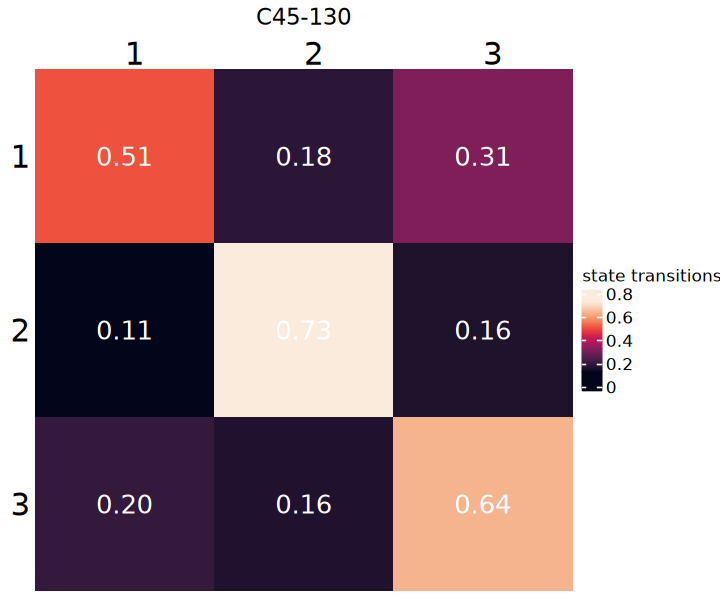

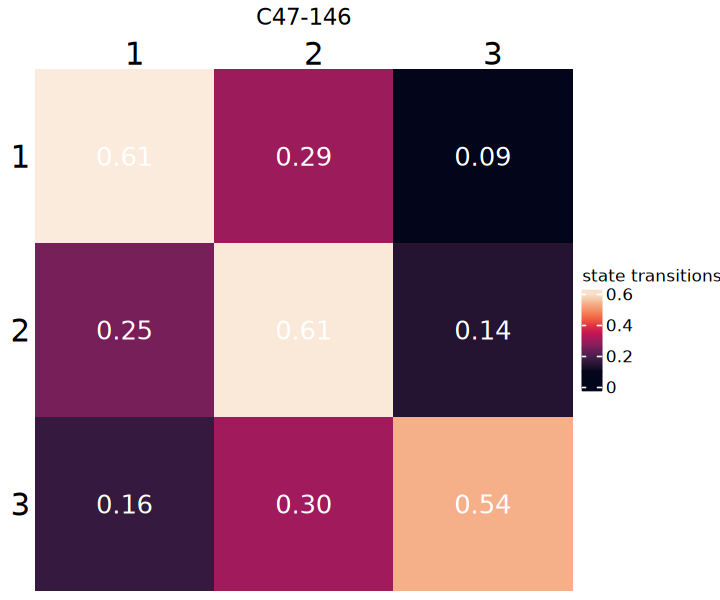

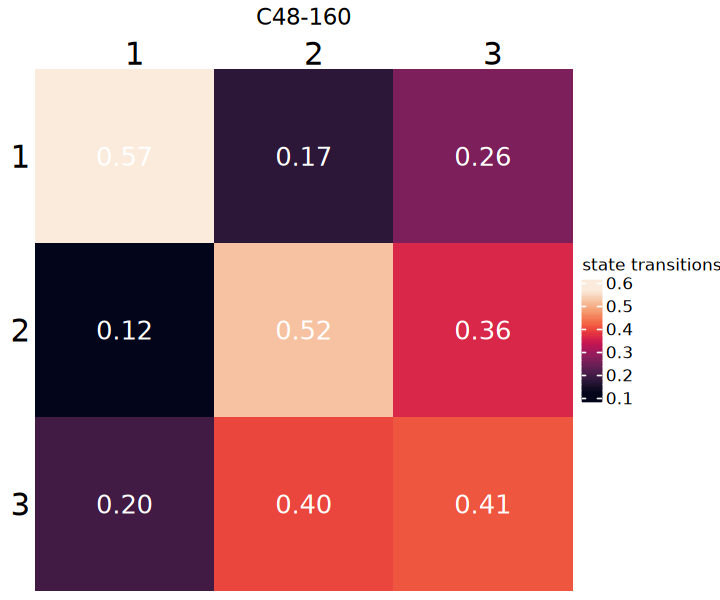

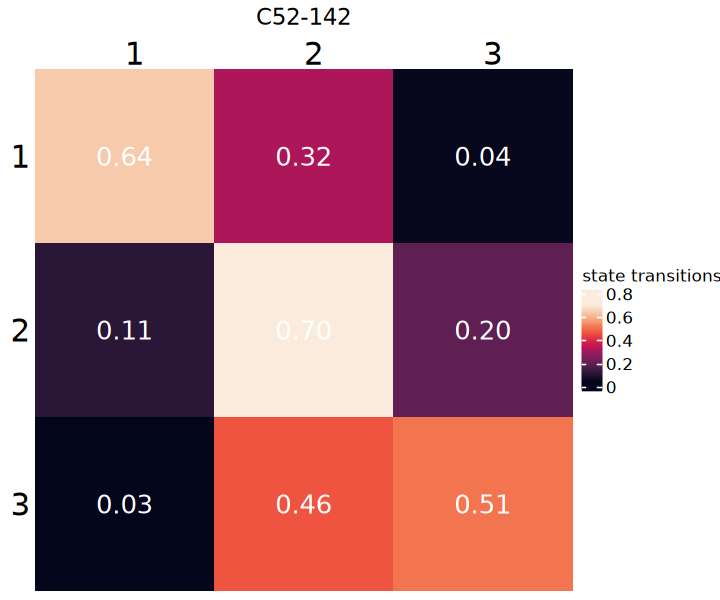

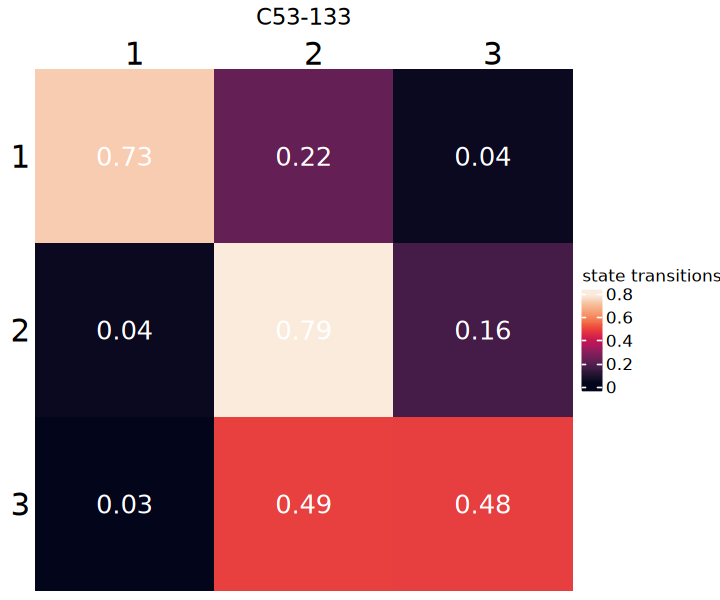

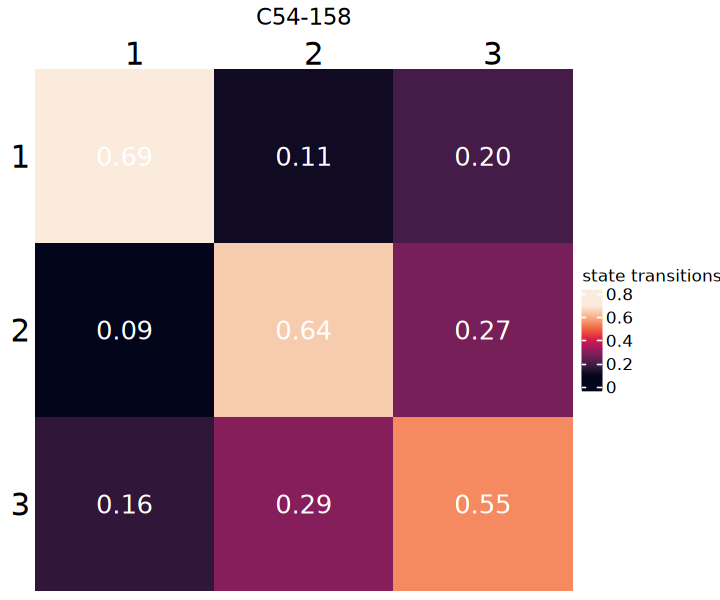

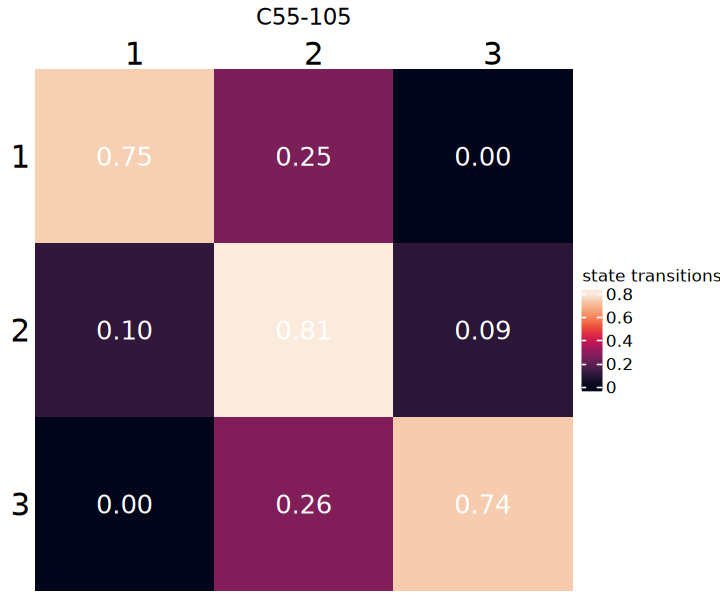

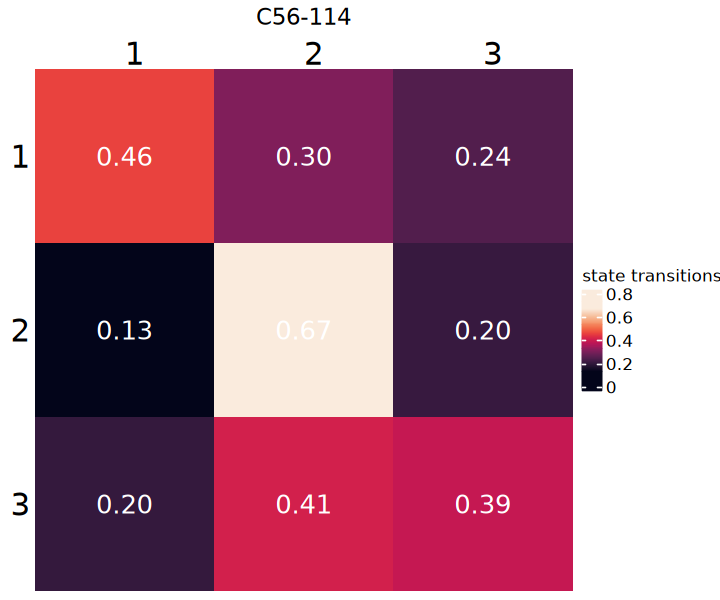

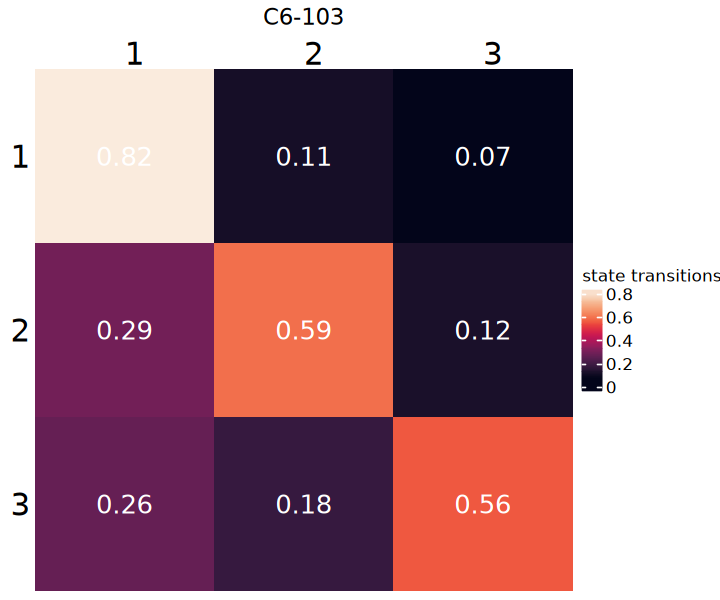

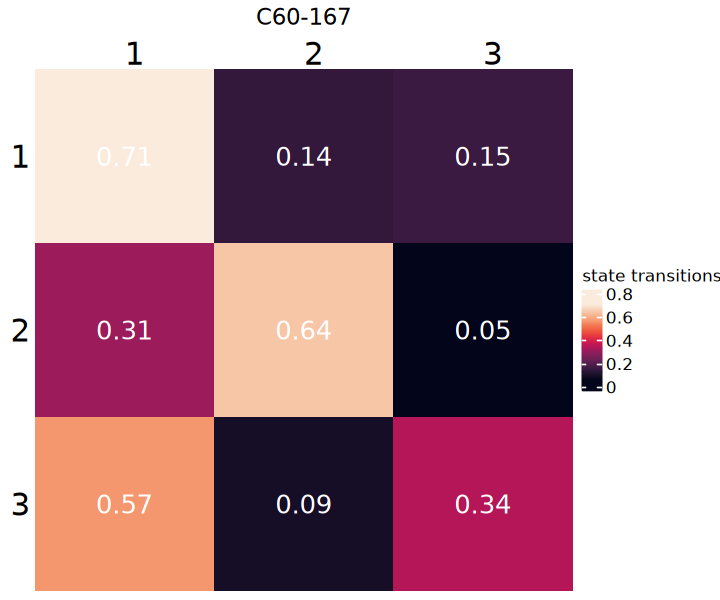

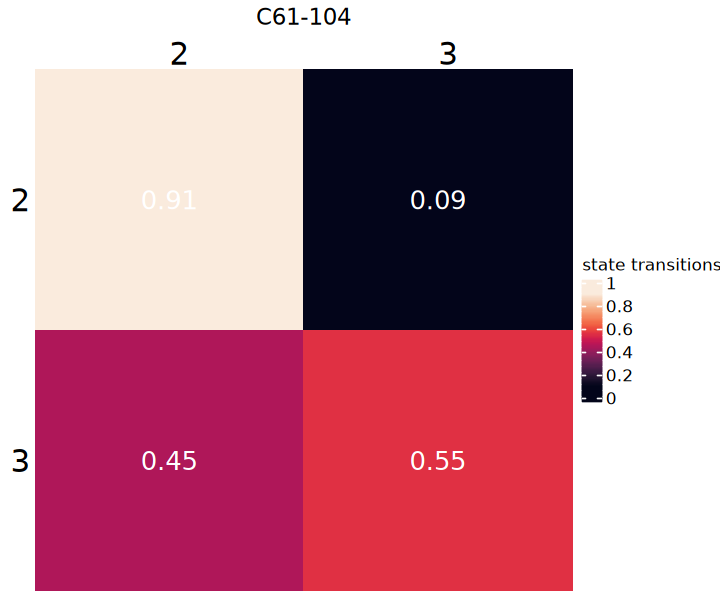

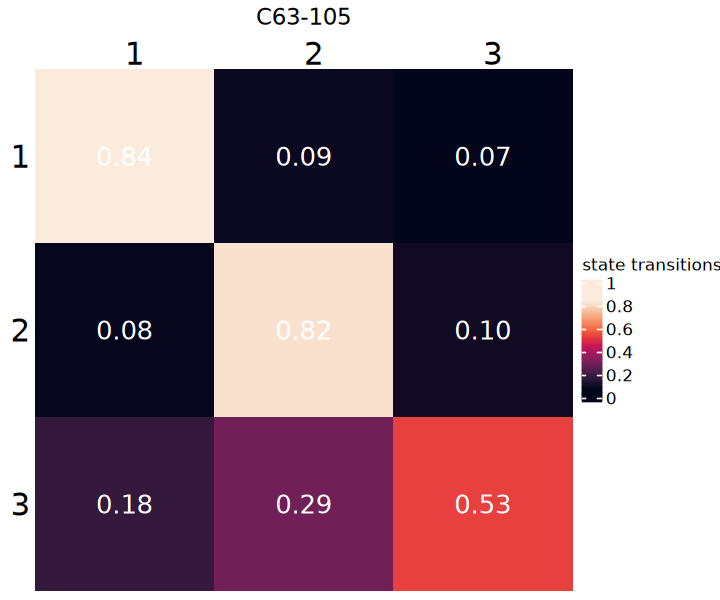

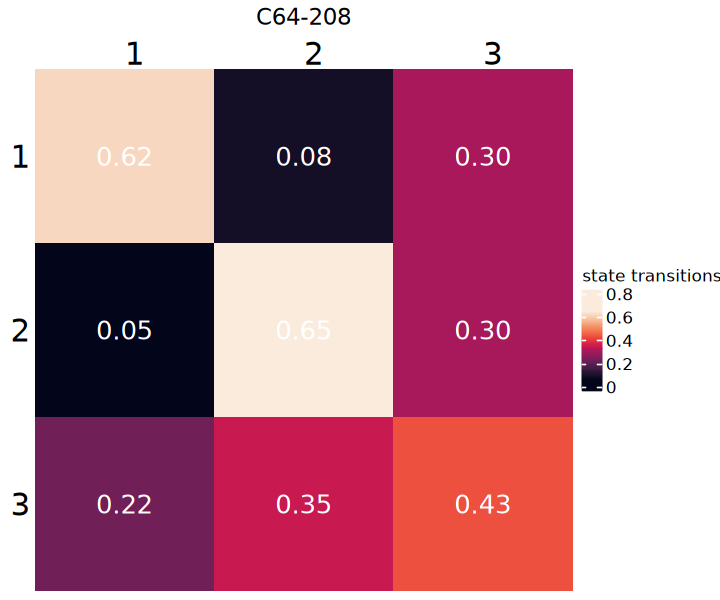

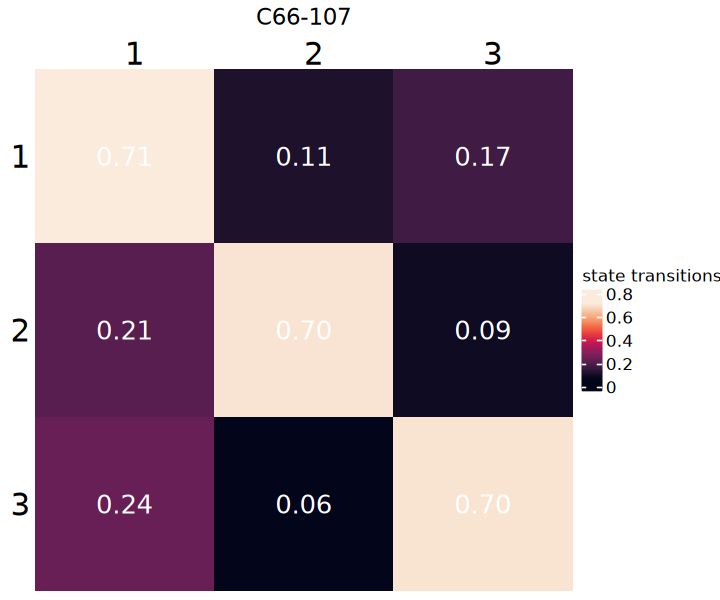

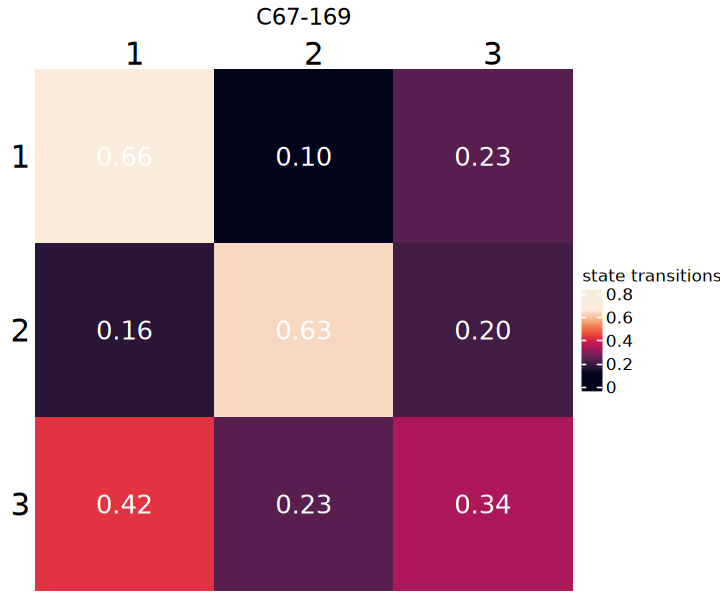

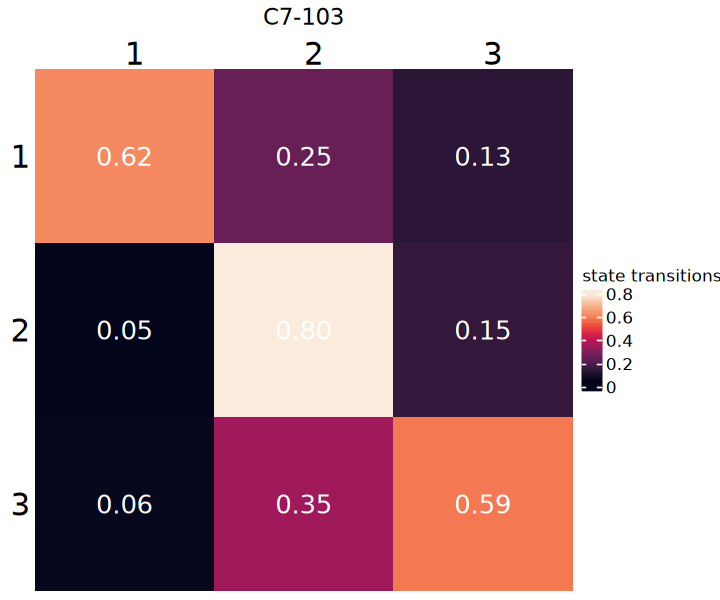

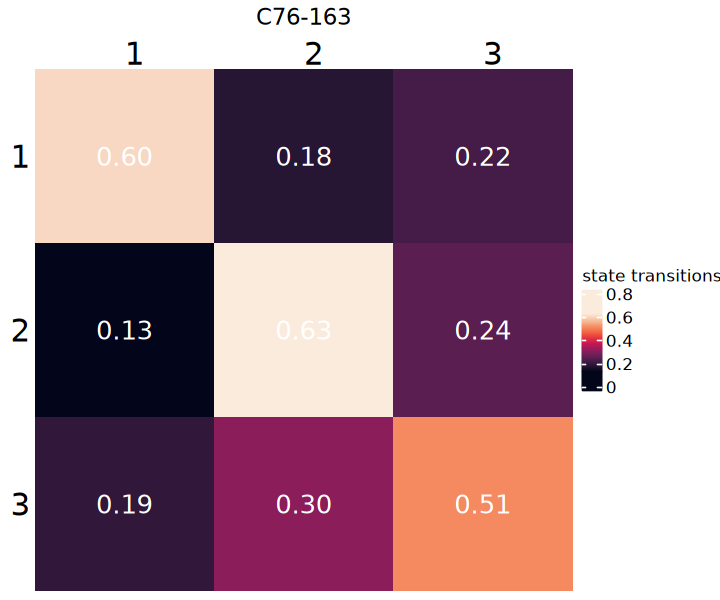

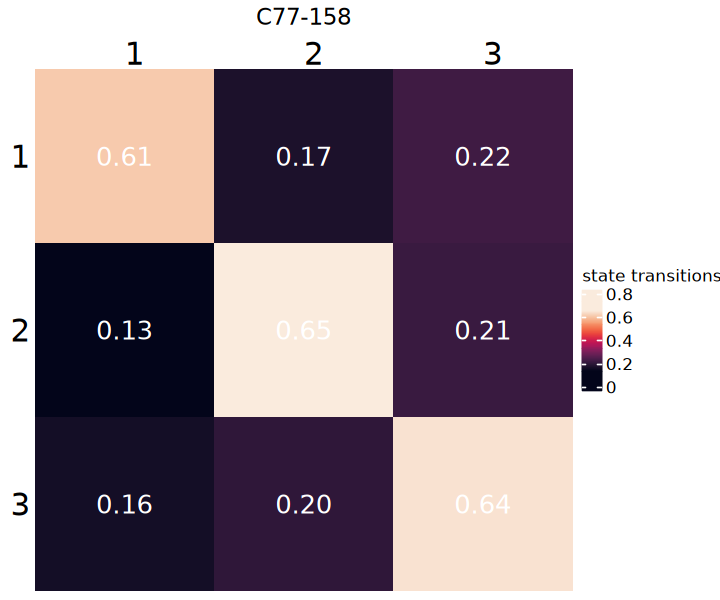

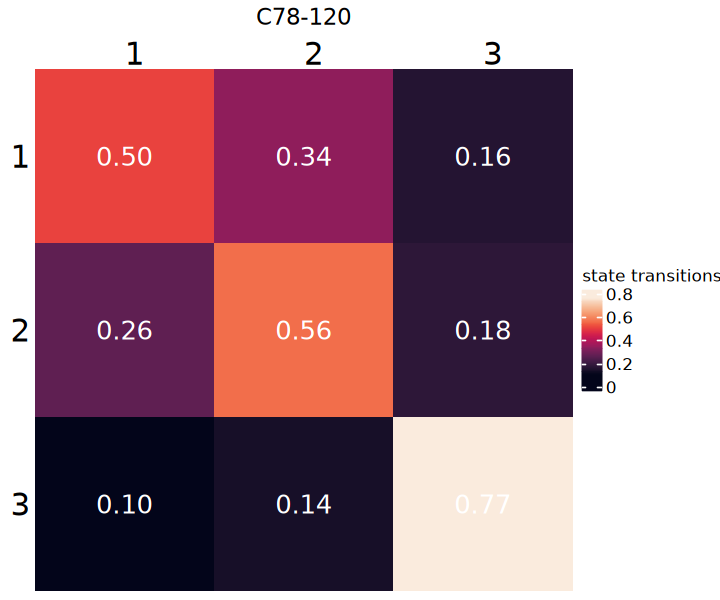

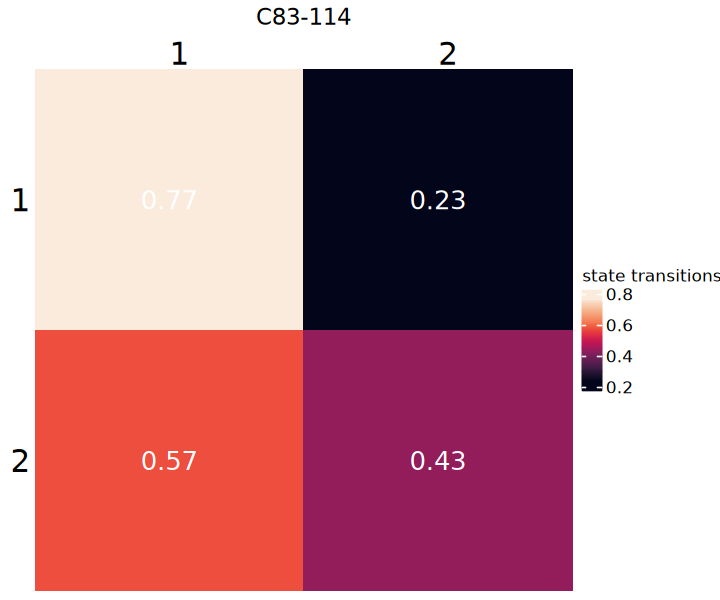

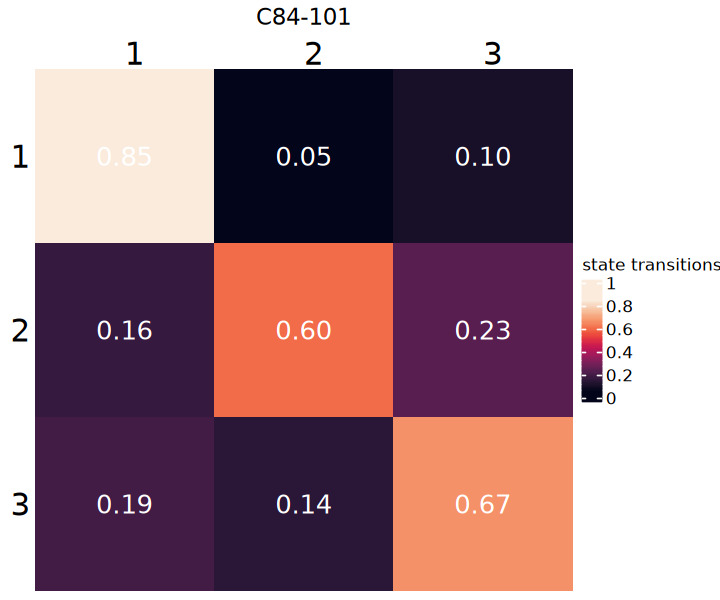

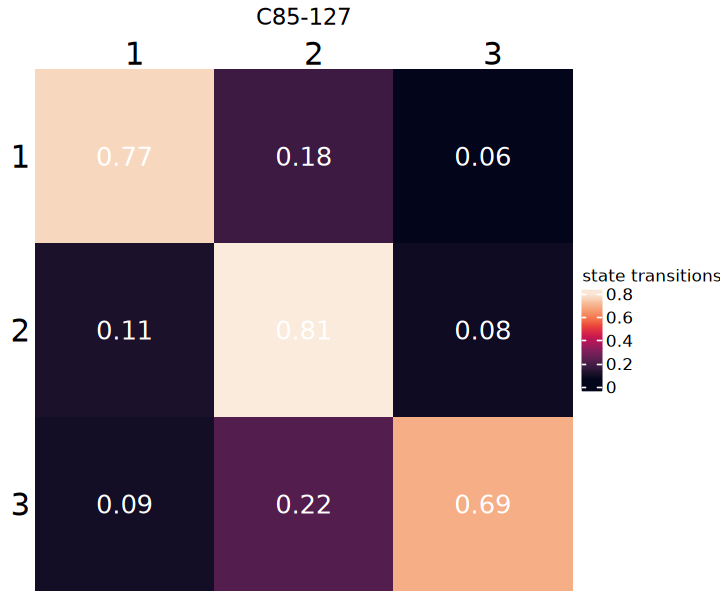

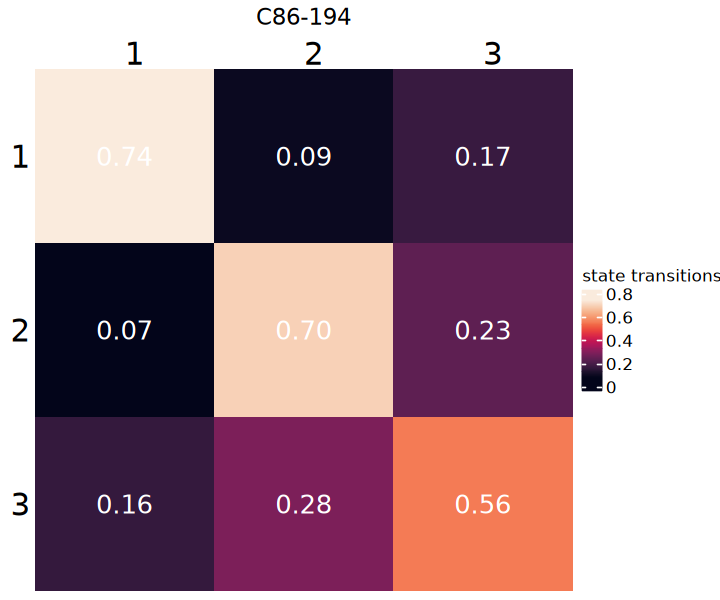

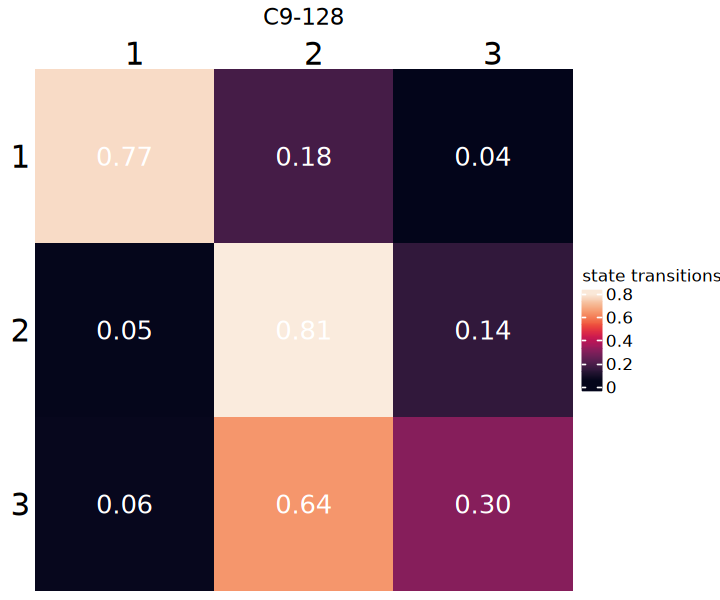

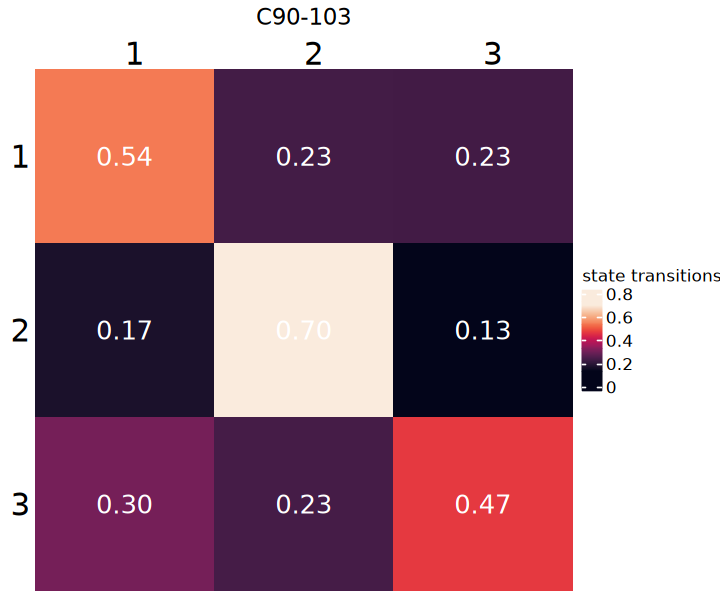

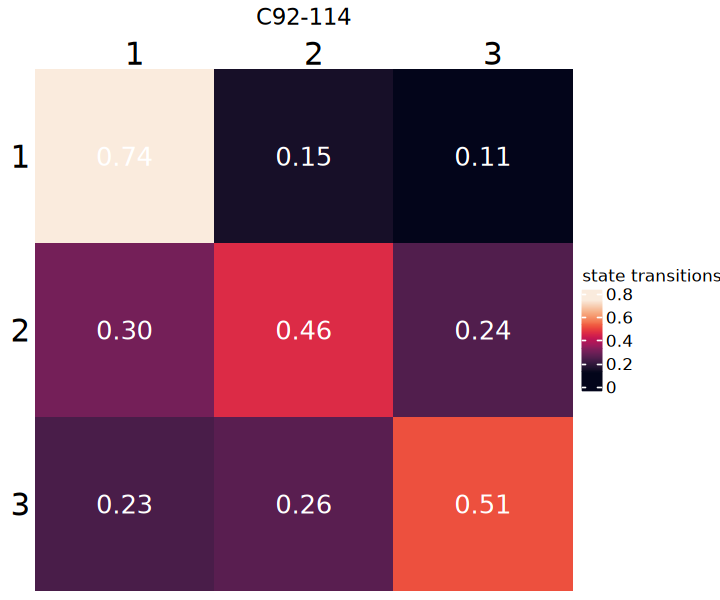

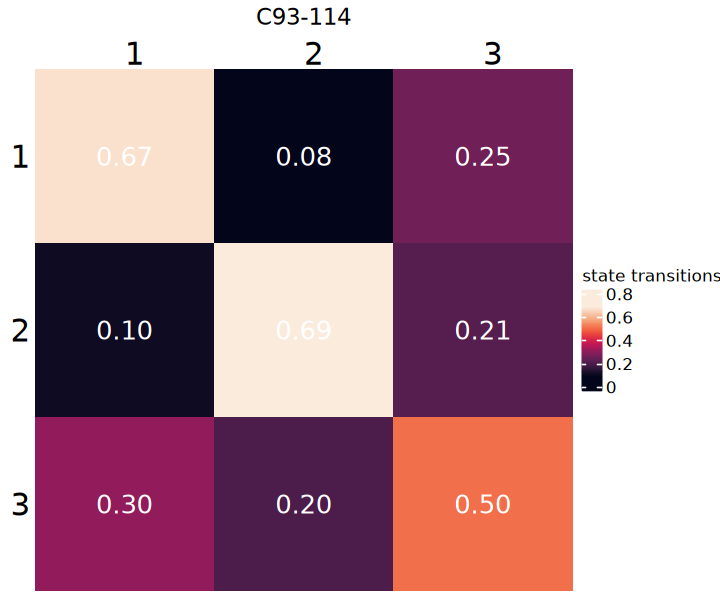

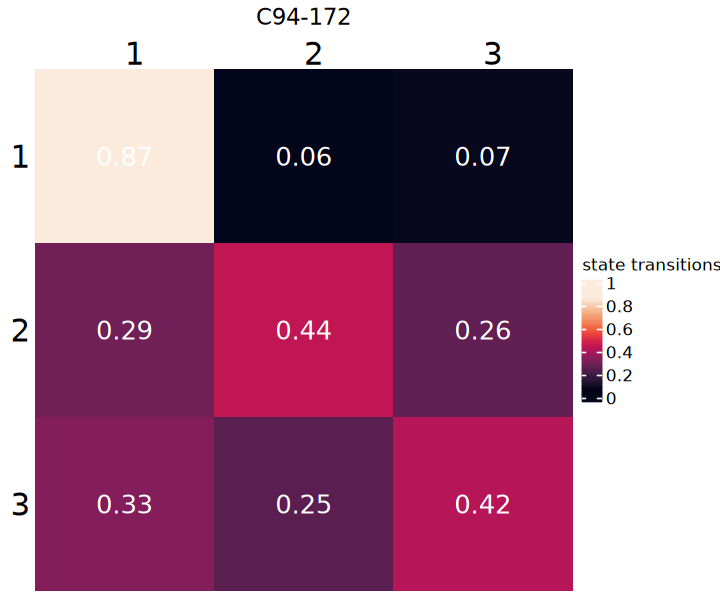

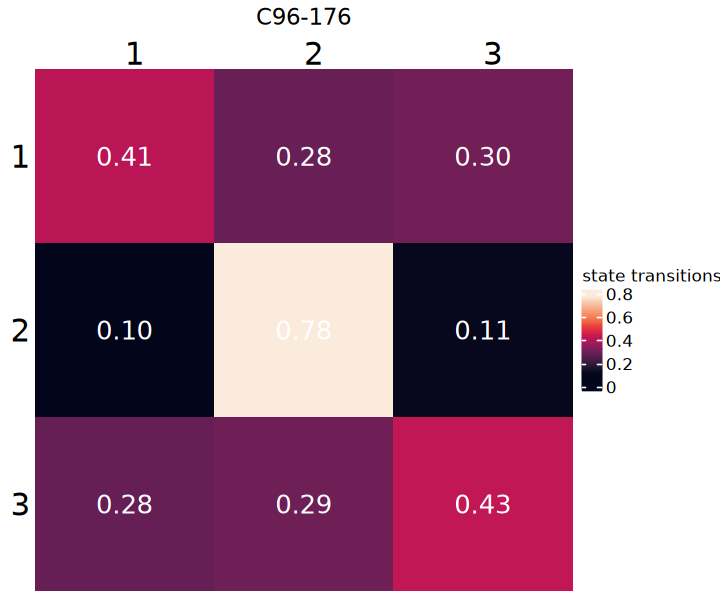

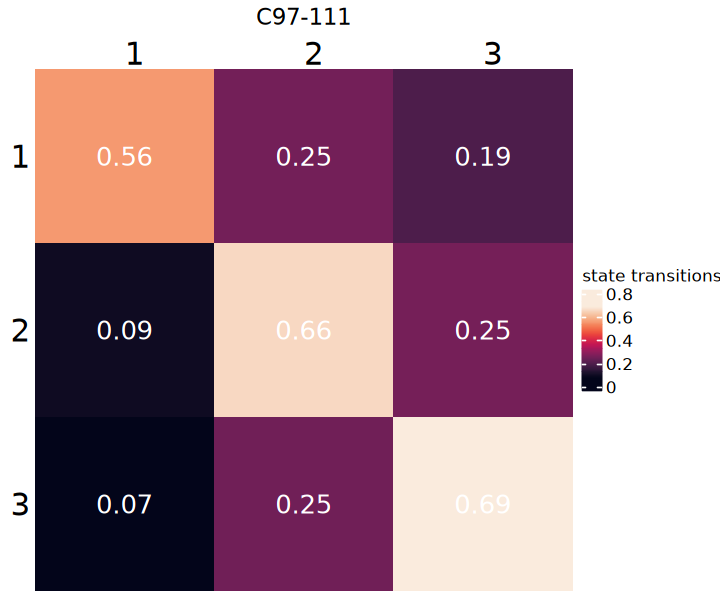

In [8]:
for (treefile in treefiles){
    clone_size <- as.numeric(gsub('.phy.treefile','',unlist(strsplit(treefile,split = '-'))[3]))
    if(clone_size < 100){
        next
    }
    file <- treefile
    lineageGrp <- paste0(unlist(strsplit(treefile,split = '-'))[2],'-',clone_size)
    tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T1/polytomy/',file))
    tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
    #tree$edge.length <- rep(1,length(tree$edge.length)) # node length whether ==1?
    tree <- drop.tip(tree,tree$tip.label[!tree$tip.label %in% metadata$cellName])
    tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
    df <- as.data.frame(table(tree$states))
    df$ratio <- df$Freq / sum(df$Freq)
    clusters <- as.character(df[df$ratio>0.1,'Var1'])
    tree <- drop.tip(tree,tree$tip.label[!tree$states %in% clusters])
    tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
    tree$edge.length <- rep(1,length(tree$edge.length))
    #print(length(unique(tree$states)))

    if (length(unique(tree$states))!=1){
    #print(tree)
    Pinf <- PATH_inf(tree = tree, cell_states = "states", nstates = length(unique(tree$states)))

    options(repr.plot.width=6, repr.plot.height=5)
    plot <- Heatmap(Pinf$P,column_title = lineageGrp,rocket(256),
            row_names_gp = gpar(fontsize = 18, fontface = "bold"), 
            column_names_gp = gpar(fontsize = 18, fontface = "bold"),
            cluster_rows = F,cluster_columns = F,row_names_side = 'left',column_names_side = 'top',column_names_rot = 0,
            cell_fun = function(j, i, x, y, width, height, fill) {
                    grid.text(sprintf("%.2f", as.matrix(Pinf$P)[i, j]), x, y, gp = gpar(fontsize = 15,col = "white"))
                    },
            heatmap_legend_param = list(title = "state transitions")
                   )

    print(plot)
    write.table(Pinf$P,file=paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/T1/',lineageGrp,'_cell_transition_T1.csv'),sep=',',quote=F,col.names = NA) 
    grid.newpage() 
}
}

# T2&T3

In [3]:
treefiles <- grep('treefile',list.files('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T2_and_T3/polytomy/'),value = T)

In [4]:
treefiles

[1] "cell_mutation_matrix-C10-793.phy.treefile"
  [2] "cell_mutation_matrix-C100-46.phy.treefile"
  [3] "cell_mutation_matrix-C102-51.phy.treefile"
  [4] "cell_mutation_matrix-C103-49.phy.treefile"
  [5] "cell_mutation_matrix-C105-82.phy.treefile"
  [6] "cell_mutation_matrix-C108-32.phy.treefile"
  [7] "cell_mutation_matrix-C109-67.phy.treefile"
  [8] "cell_mutation_matrix-C11-400.phy.treefile"
  [9] "cell_mutation_matrix-C111-26.phy.treefile"
 [10] "cell_mutation_matrix-C112-43.phy.treefile"
 [11] "cell_mutation_matrix-C113-38.phy.treefile"
 [12] "cell_mutation_matrix-C119-32.phy.treefile"
 [13] "cell_mutation_matrix-C12-82.phy.treefile" 
 [14] "cell_mutation_matrix-C120-20.phy.treefile"
 [15] "cell_mutation_matrix-C124-11.phy.treefile"
 [16] "cell_mutation_matrix-C126-33.phy.treefile"
 [17] "cell_mutation_matrix-C129-67.phy.treefile"
 [18] "cell_mutation_matrix-C13-636.phy.treefile"
 [19] "cell_mutation_matrix-C130-53.phy.treefile"
 [20] "cell_mutation_matrix-C132-49.phy.treefile"
 [21] "cell_mutation_matrix-C136-95.phy.treefile"
 [22] "cell_mutation_matrix-C137-16.phy.treefile"
 [23] "cell_mutation_matrix-C14-573.phy.treefile"
 [24] "cell_mutation_matrix-C140-12.phy.treefile"
 [25] "cell_mutation_matrix-C144-56.phy.treefile"
 [26] "cell_mutation_matrix-C145-28.phy.treefile"
 [27] "cell_mutation_matrix-C149-26.phy.treefile"
 [28] "cell_mutation_matrix-C15-405.phy.treefile"
 [29] "cell_mutation_matrix-C150-42.phy.treefile"
 [30] "cell_mutation_matrix-C152-24.phy.treefile"
 [31] "cell_mutation_matrix-C157-38.phy.treefile"
 [32] "cell_mutation_matrix-C159-32.phy.treefile"
 [33] "cell_mutation_matrix-C16-577.phy.treefile"
 [34] "cell_mutation_matrix-C167-12.phy.treefile"
 [35] "cell_mutation_matrix-C17-604.phy.treefile"
 [36] "cell_mutation_matrix-C170-12.phy.treefile"
 [37] "cell_mutation_matrix-C174-13.phy.treefile"
 [38] "cell_mutation_matrix-C18-49.phy.treefile" 
 [39] "cell_mutation_matrix-C19-731.phy.treefile"
 [40] "cell_mutation_matrix-C2-4397.phy.treefile"
 [41] "cell_mutation_matrix-C20-341.phy.treefile"
 [42] "cell_mutation_matrix-C21-51.phy.treefile" 
 [43] "cell_mutation_matrix-C23-242.phy.treefile"
 [44] "cell_mutation_matrix-C24-11.phy.treefile" 
 [45] "cell_mutation_matrix-C26-296.phy.treefile"
 [46] "cell_mutation_matrix-C27-255.phy.treefile"
 [47] "cell_mutation_matrix-C28-540.phy.treefile"
 [48] "cell_mutation_matrix-C29-318.phy.treefile"
 [49] "cell_mutation_matrix-C3-3297.phy.treefile"
 [50] "cell_mutation_matrix-C30-233.phy.treefile"
 [51] "cell_mutation_matrix-C31-193.phy.treefile"
 [52] "cell_mutation_matrix-C32-298.phy.treefile"
 [53] "cell_mutation_matrix-C33-247.phy.treefile"
 [54] "cell_mutation_matrix-C34-49.phy.treefile" 
 [55] "cell_mutation_matrix-C35-153.phy.treefile"
 [56] "cell_mutation_matrix-C36-374.phy.treefile"
 [57] "cell_mutation_matrix-C37-103.phy.treefile"
 [58] "cell_mutation_matrix-C39-221.phy.treefile"
 [59] "cell_mutation_matrix-C4-1456.phy.treefile"
 [60] "cell_mutation_matrix-C40-270.phy.treefile"
 [61] "cell_mutation_matrix-C41-227.phy.treefile"
 [62] "cell_mutation_matrix-C42-178.phy.treefile"
 [63] "cell_mutation_matrix-C44-86.phy.treefile" 
 [64] "cell_mutation_matrix-C45-71.phy.treefile" 
 [65] "cell_mutation_matrix-C46-183.phy.treefile"
 [66] "cell_mutation_matrix-C47-44.phy.treefile" 
 [67] "cell_mutation_matrix-C48-95.phy.treefile" 
 [68] "cell_mutation_matrix-C49-194.phy.treefile"
 [69] "cell_mutation_matrix-C5-1671.phy.treefile"
 [70] "cell_mutation_matrix-C50-303.phy.treefile"
 [71] "cell_mutation_matrix-C52-31.phy.treefile" 
 [72] "cell_mutation_matrix-C53-40.phy.treefile" 
 [73] "cell_mutation_matrix-C54-65.phy.treefile" 
 [74] "cell_mutation_matrix-C55-54.phy.treefile" 
 [75] "cell_mutation_matrix-C56-60.phy.treefile" 
 [76] "cell_mutation_matrix-C57-109.phy.treefile"
 [77] "cell_mutation_matrix-C58-26.phy.treefile" 
 [78] "cell_mutation_matrix-C59-39.phy.treefile" 
 [79] "cell_mutation_matrix-C6-1249.phy.treefile"
 [80] "cell_mutation_matrix-C61-16.phy.treefile" 
 [

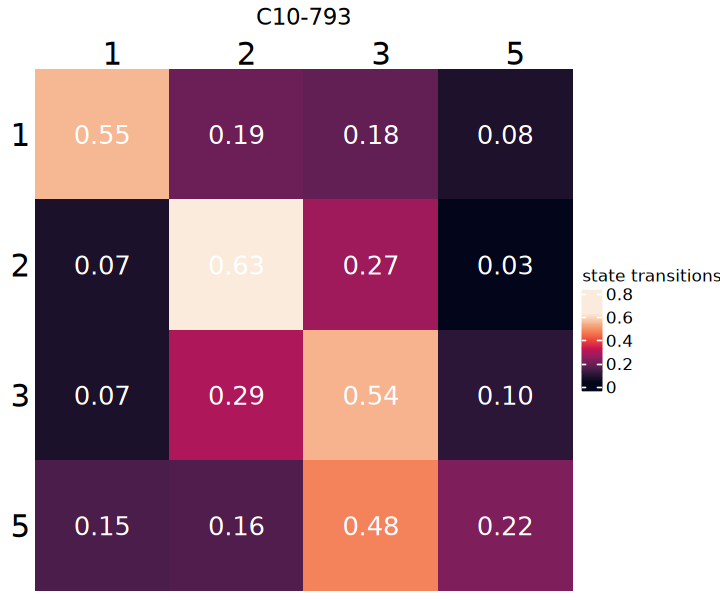

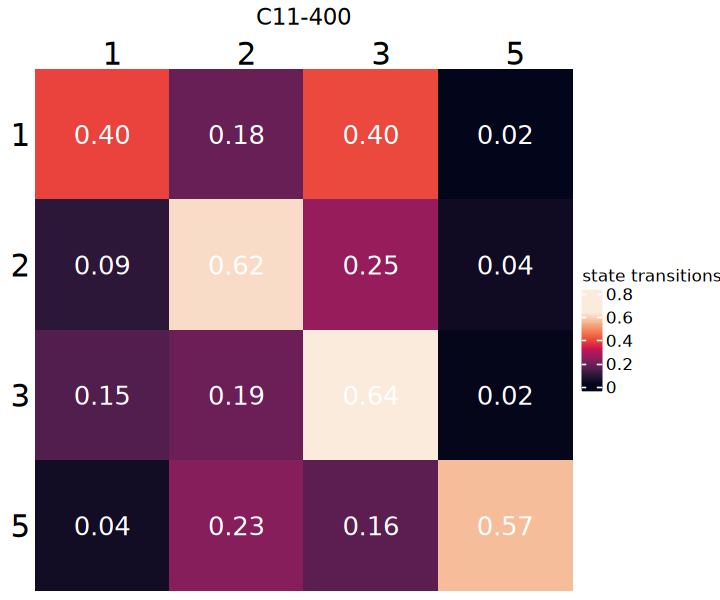

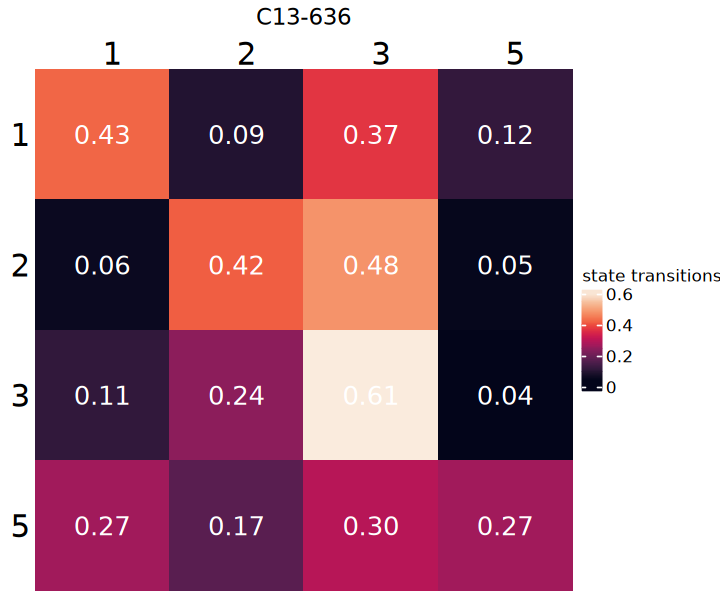

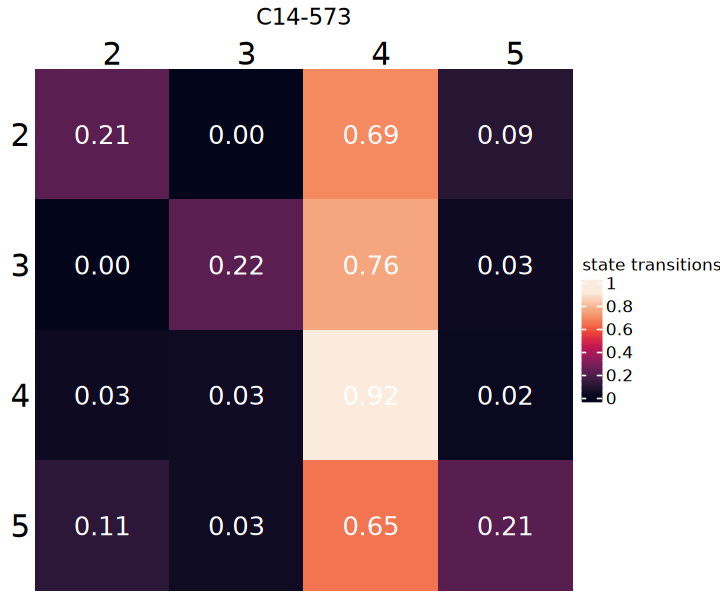

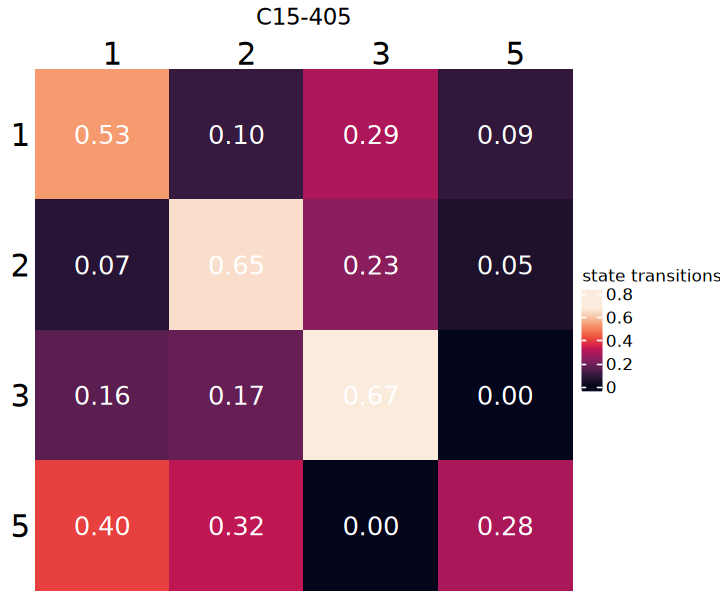

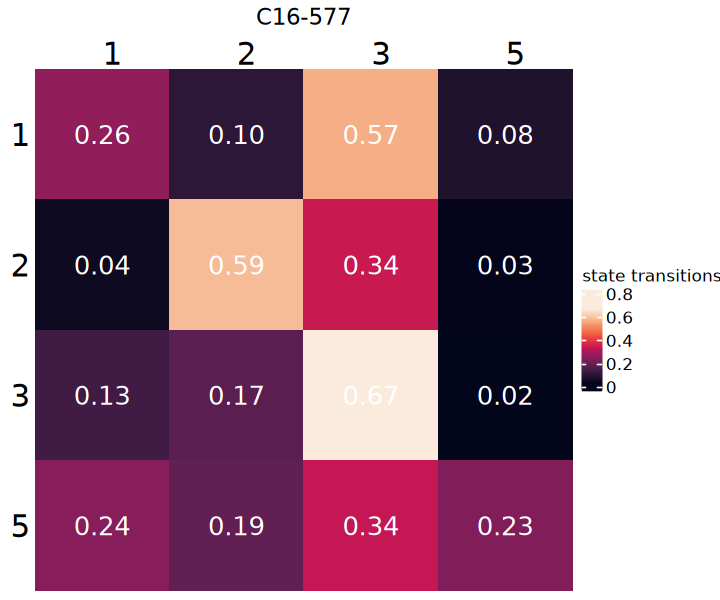

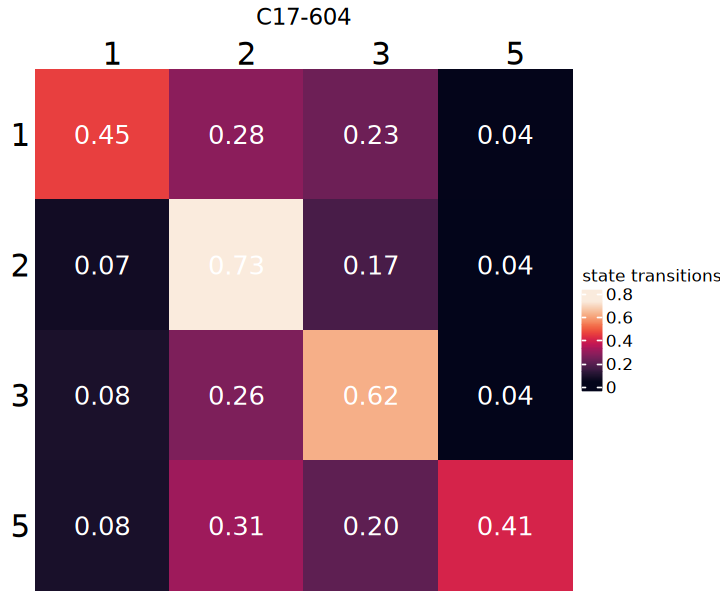

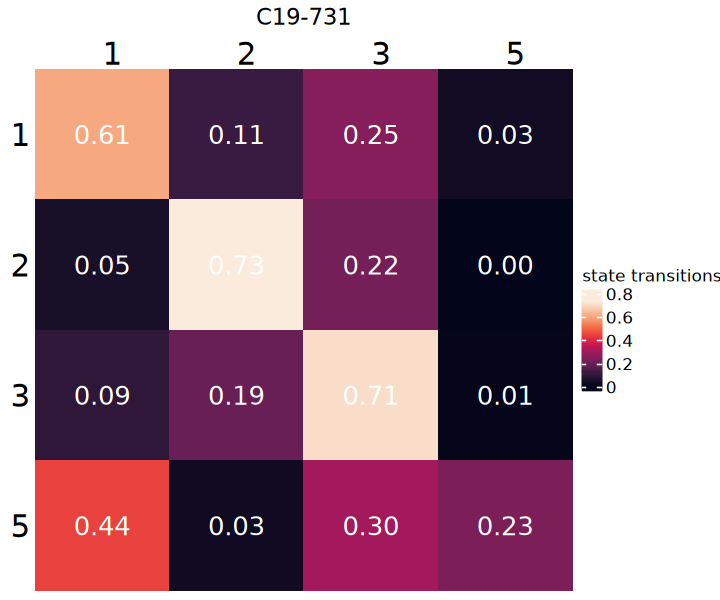

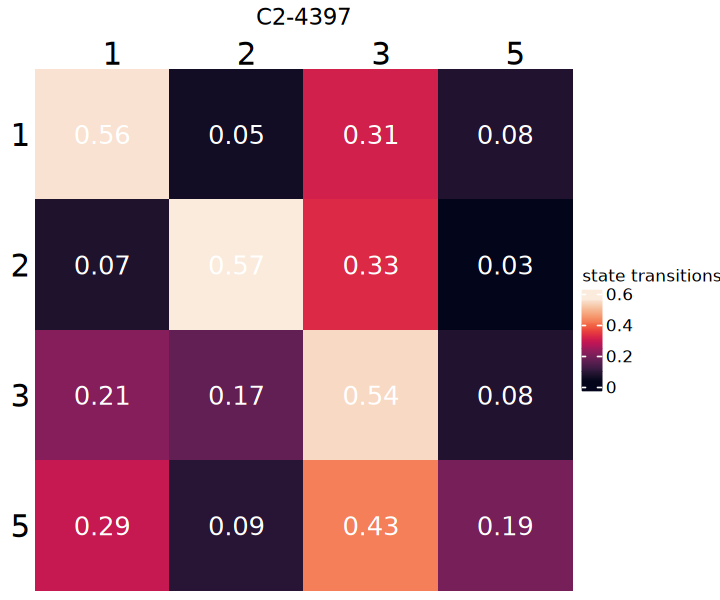

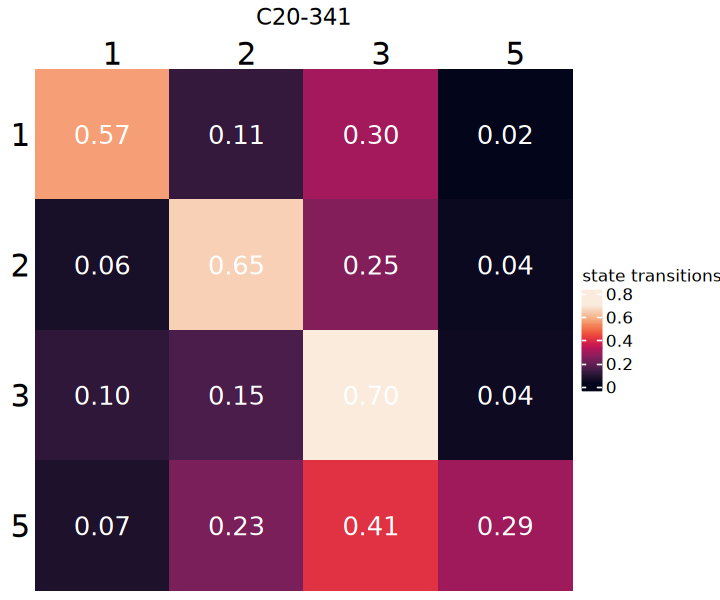

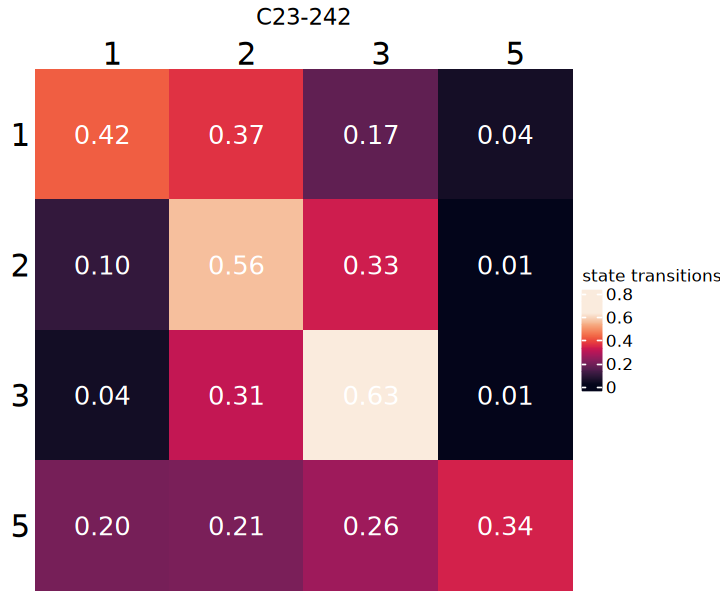

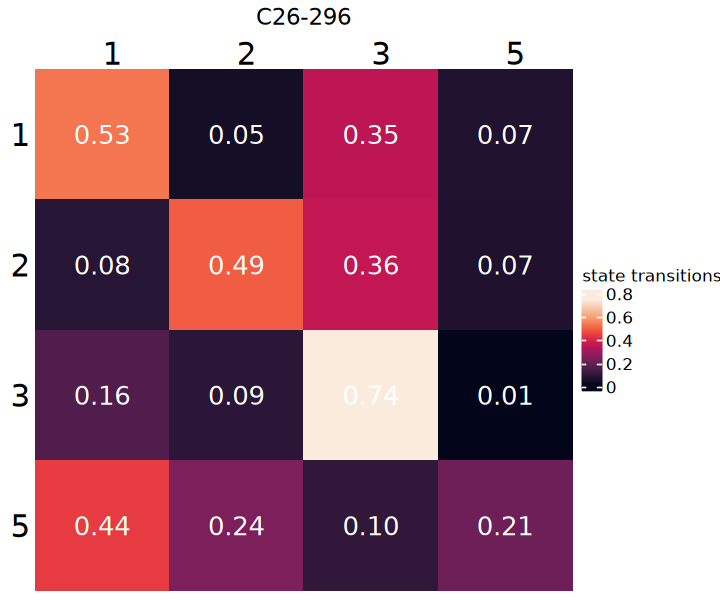

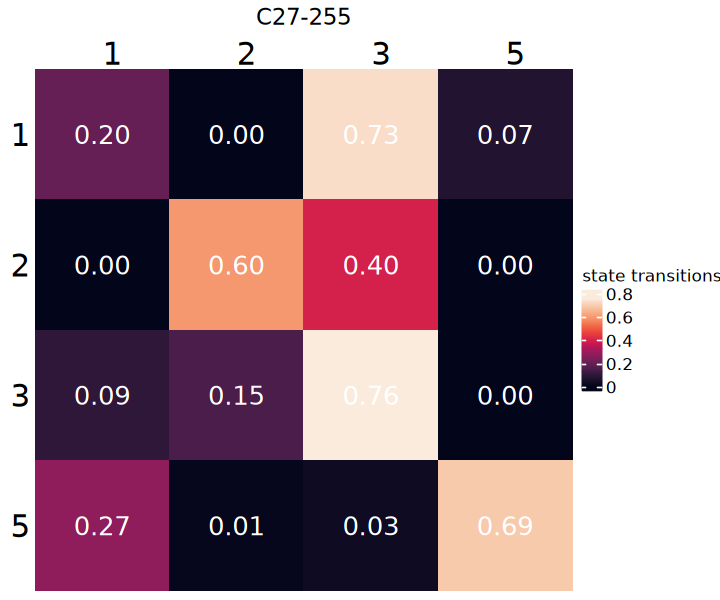

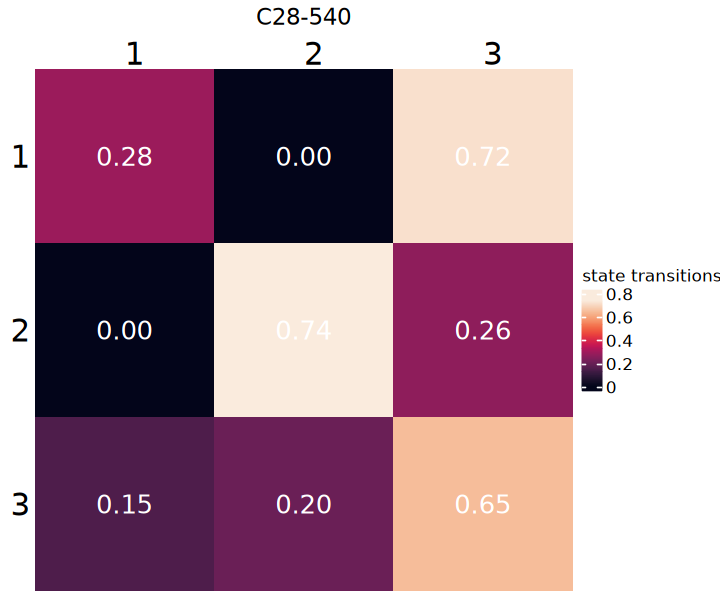

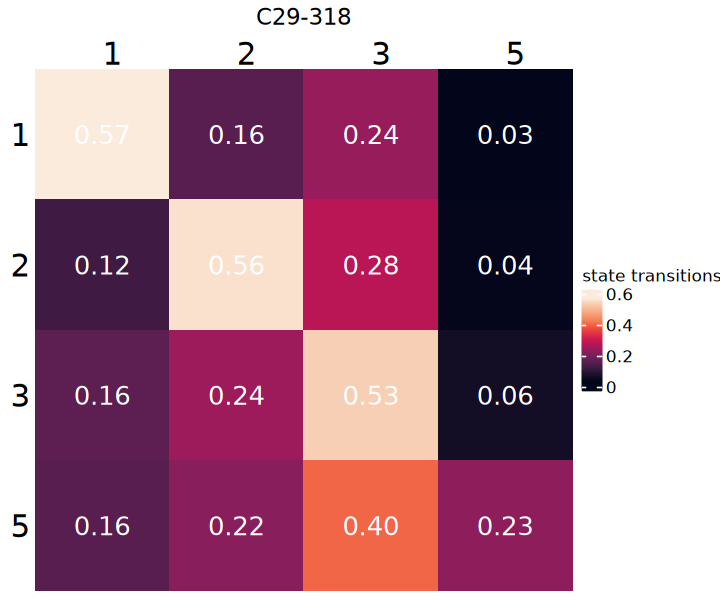

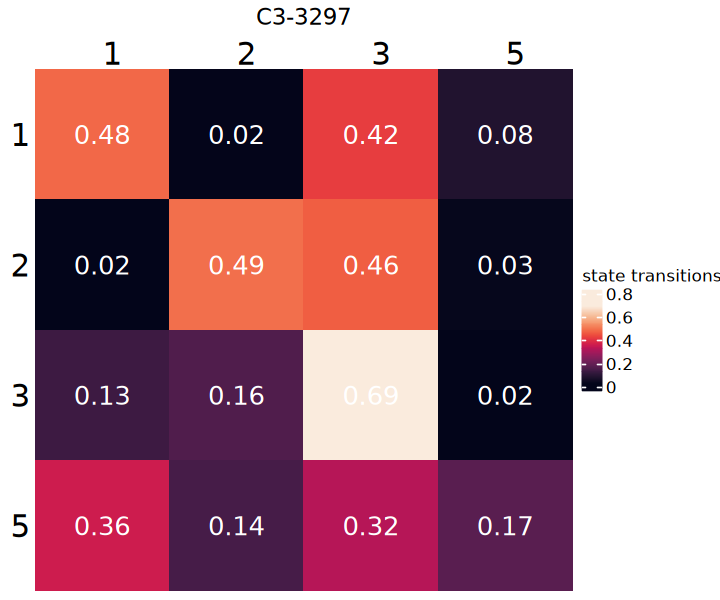

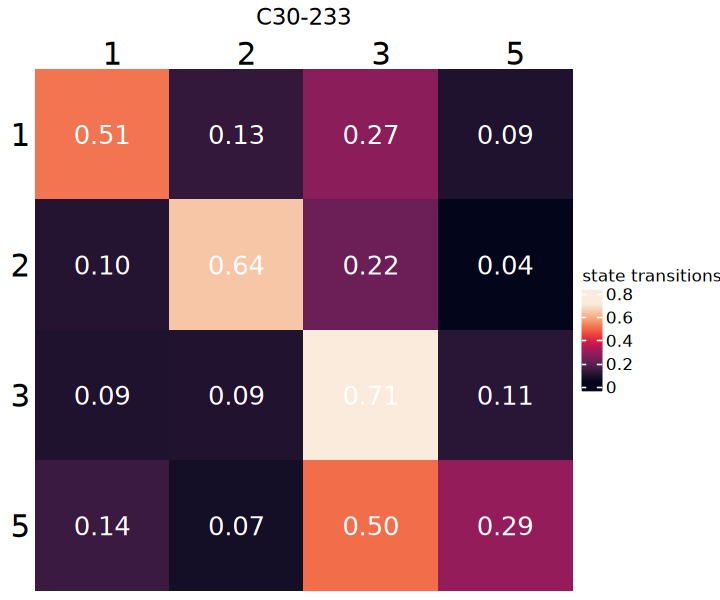

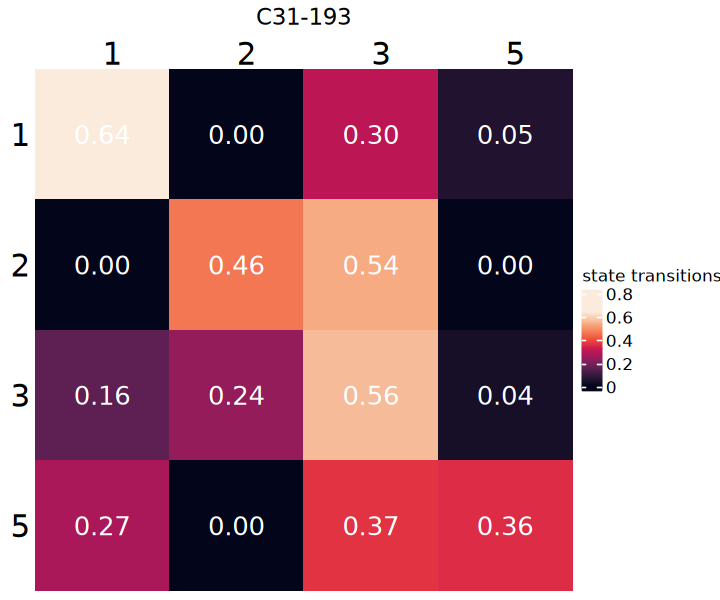

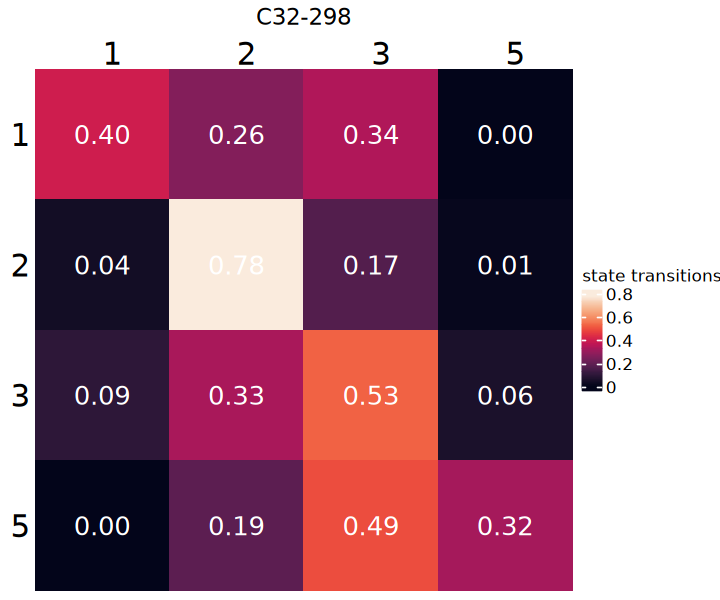

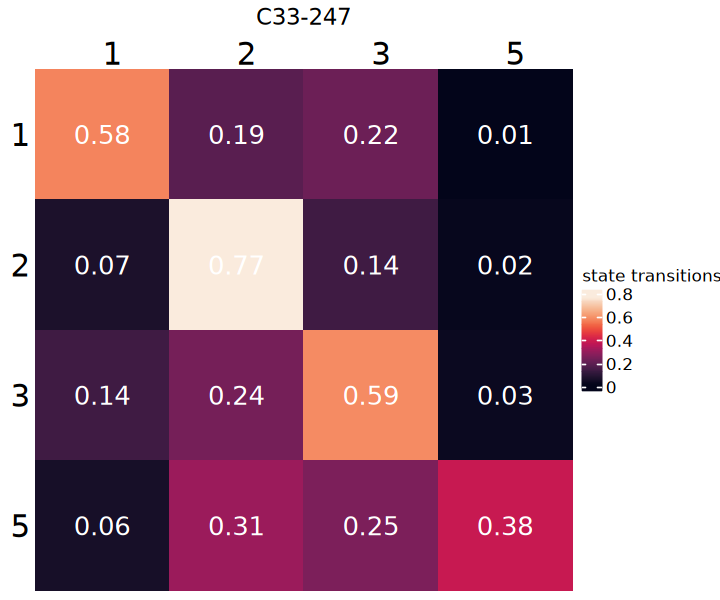

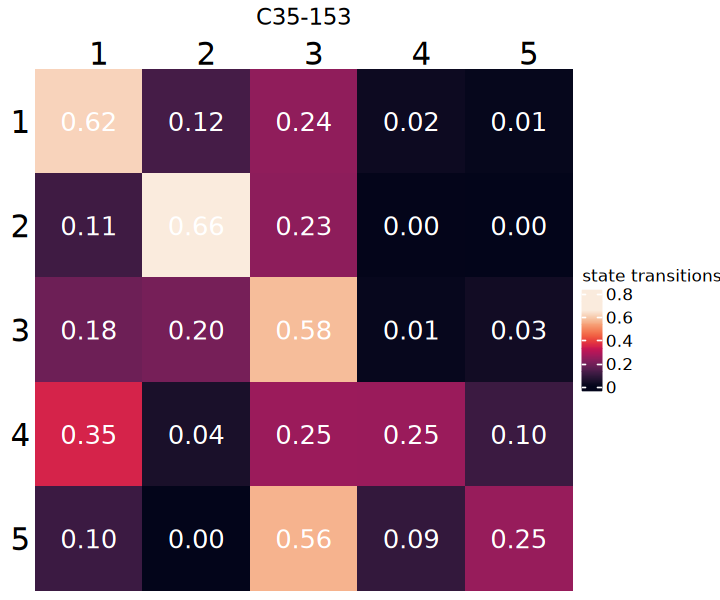

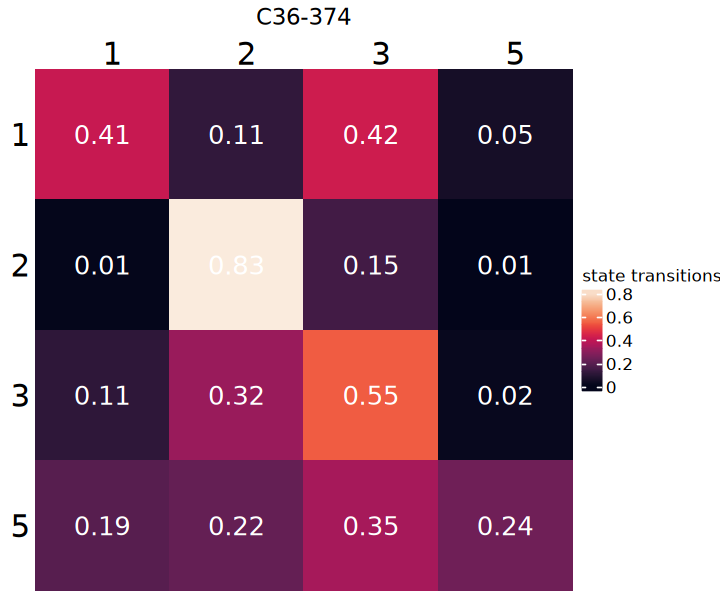

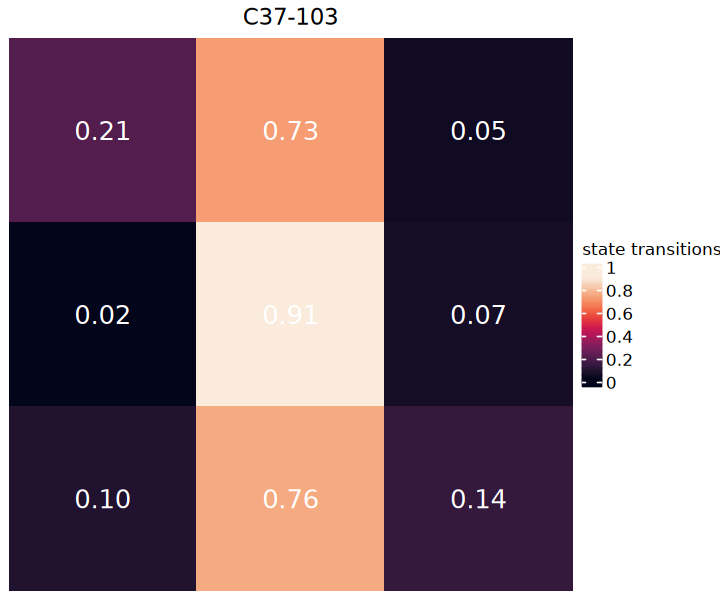

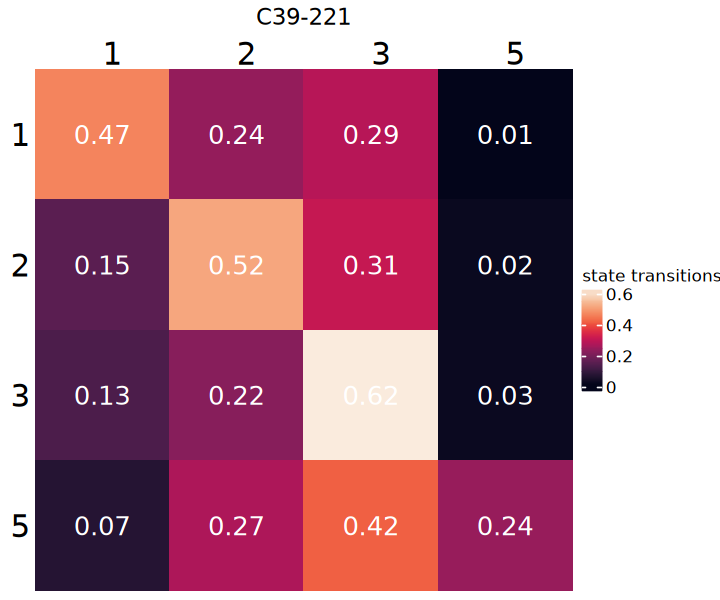

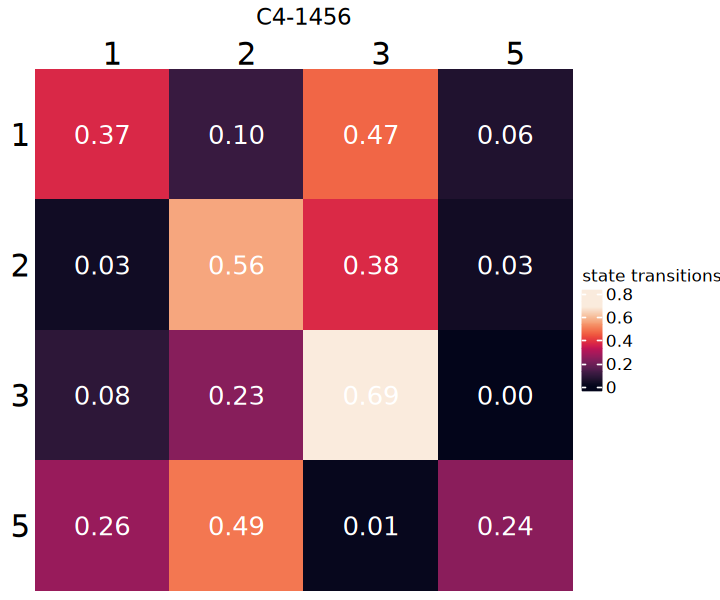

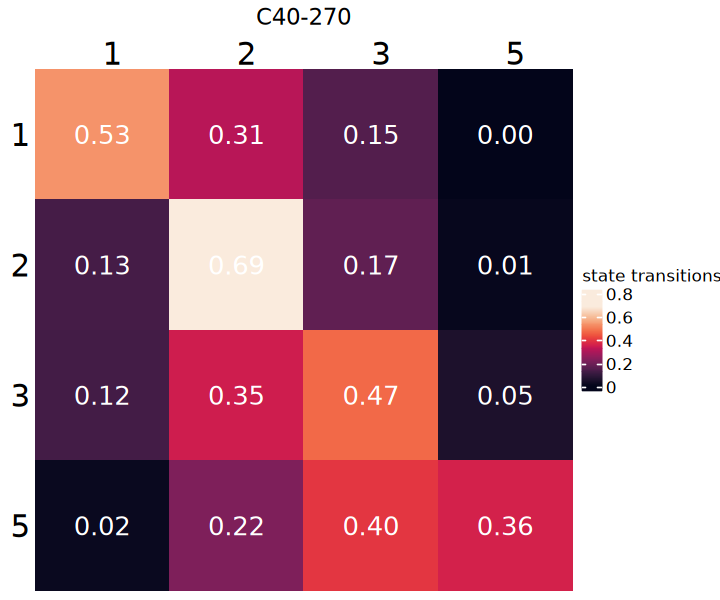

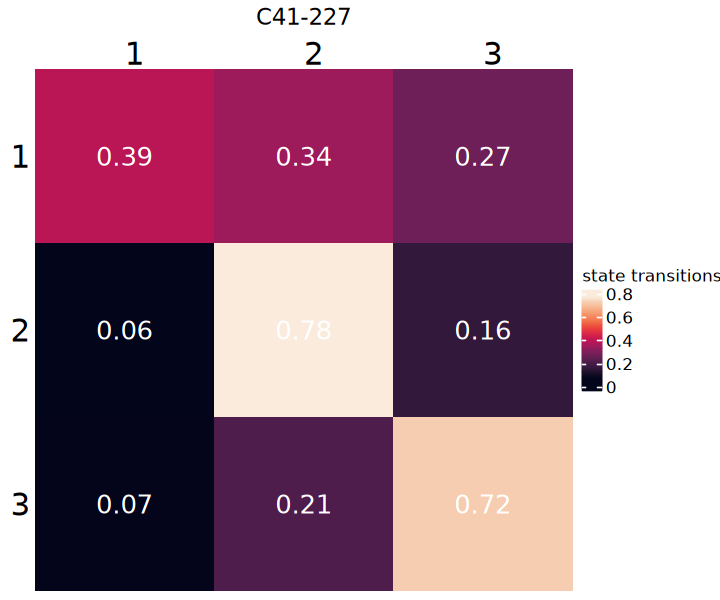

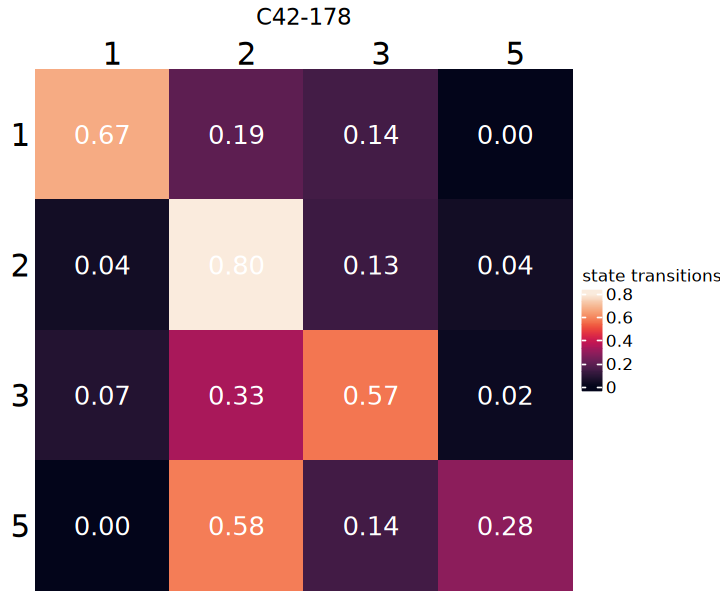

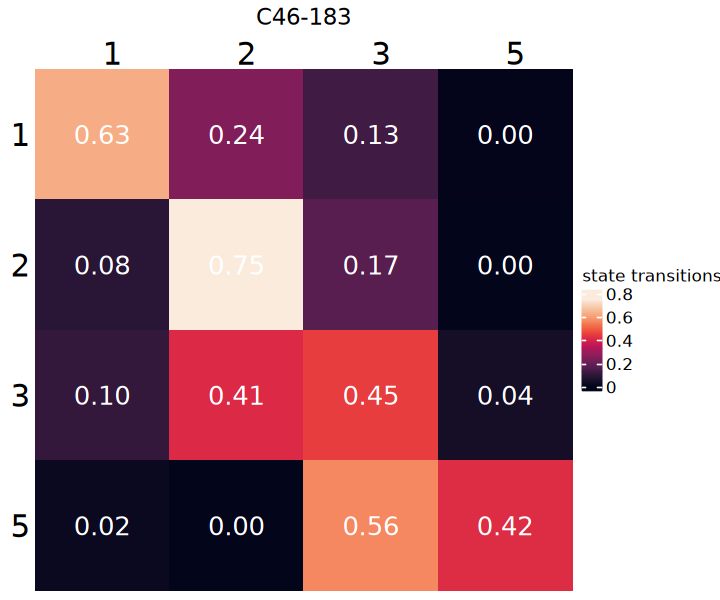

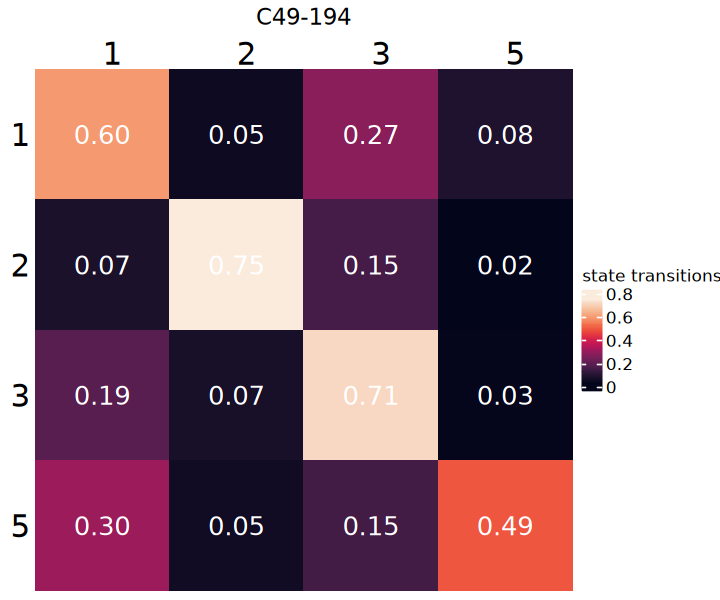

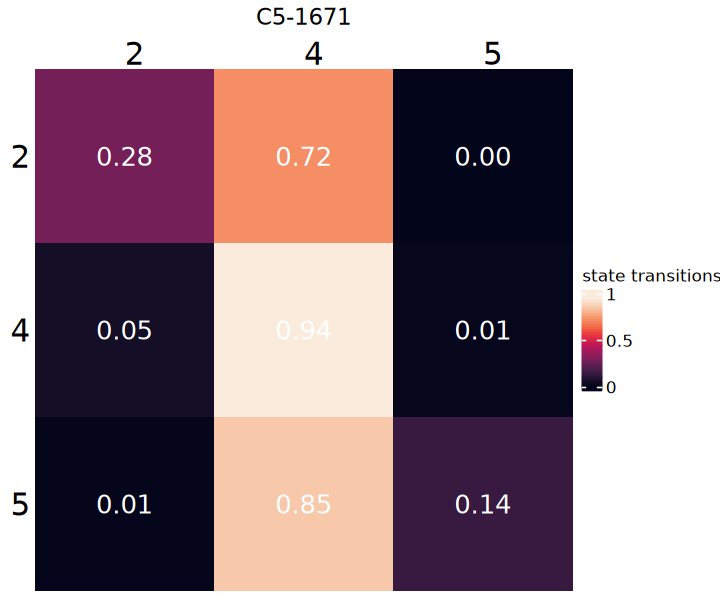

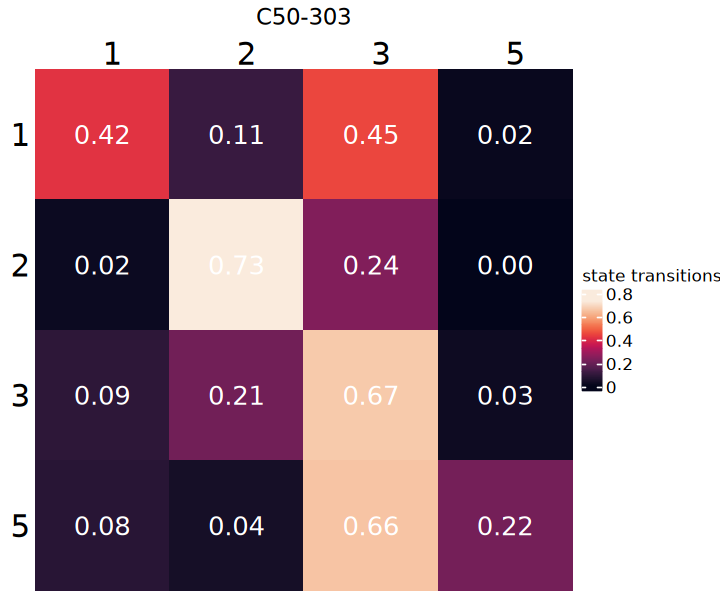

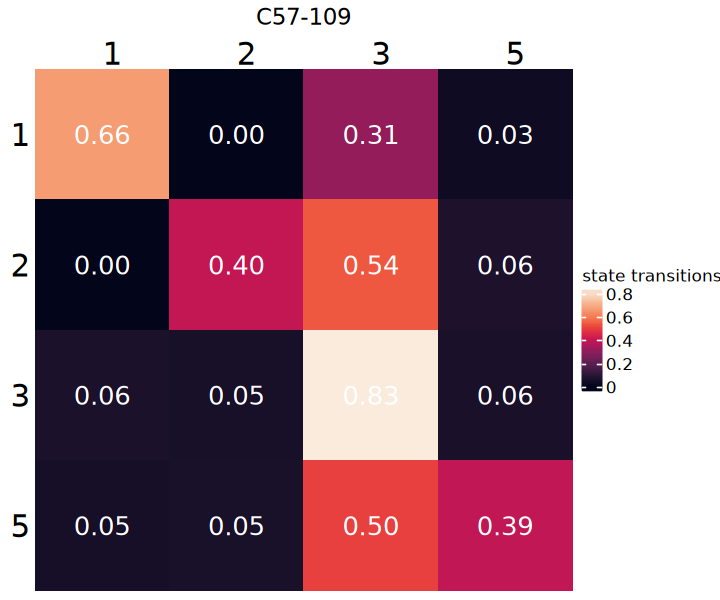

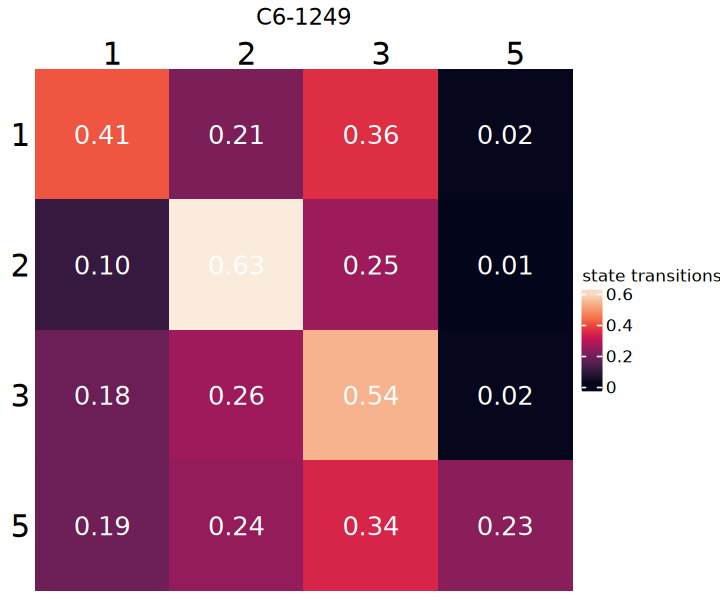

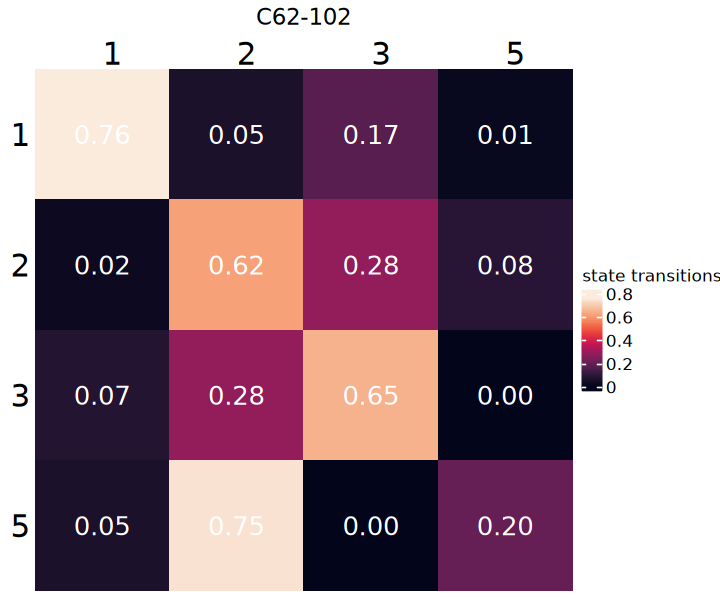

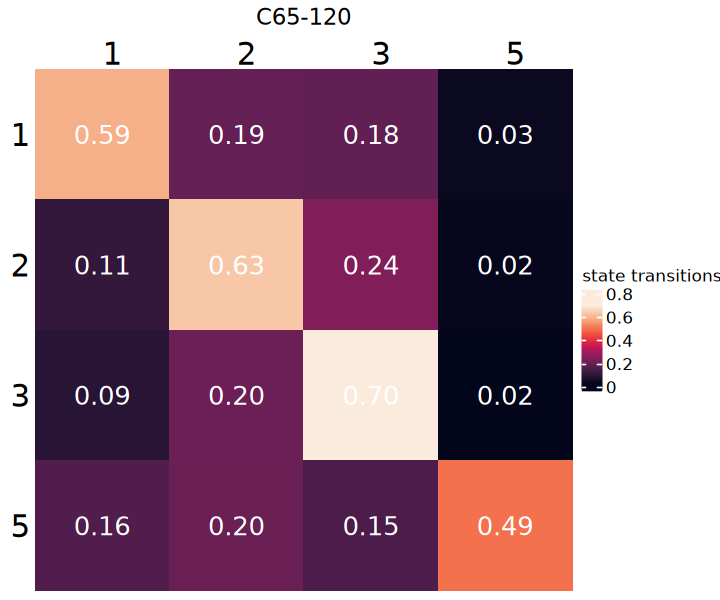

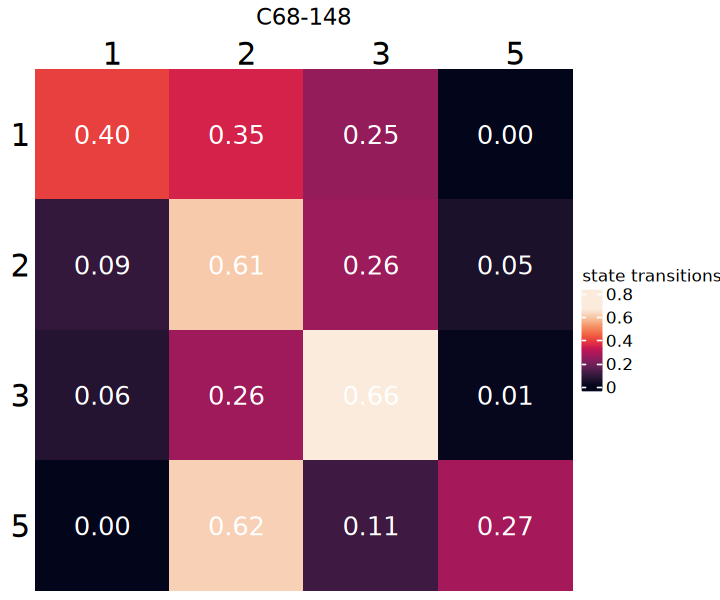

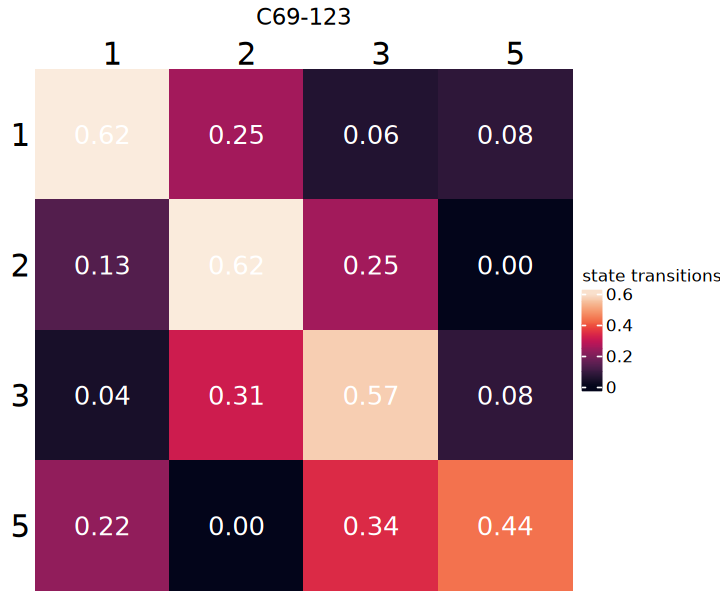

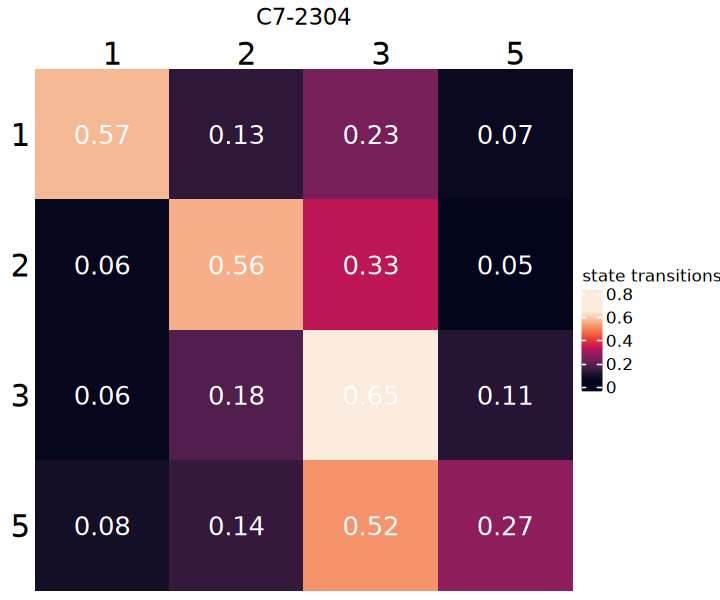

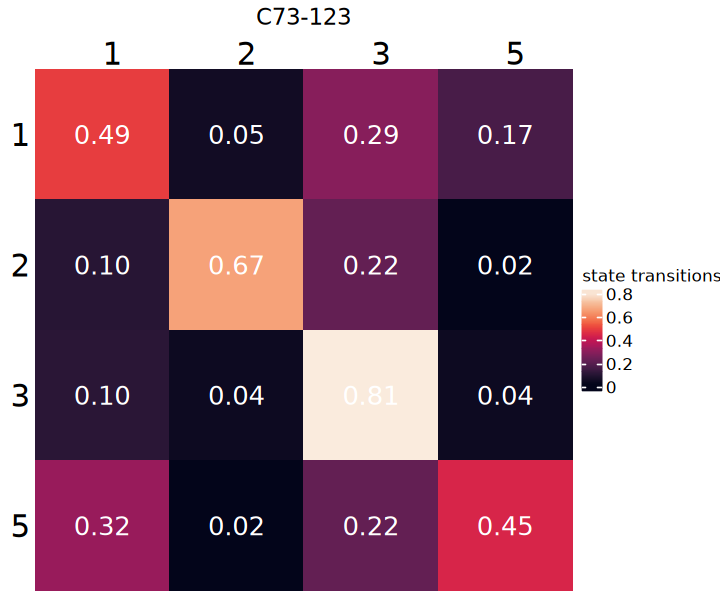

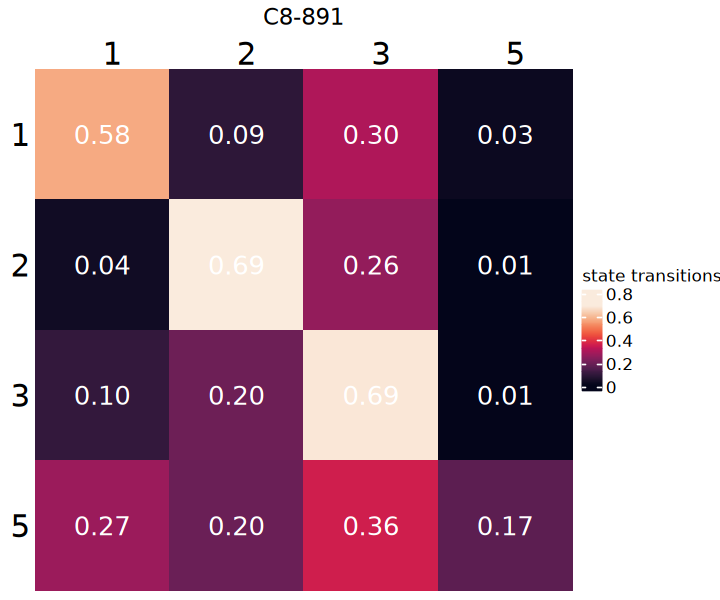

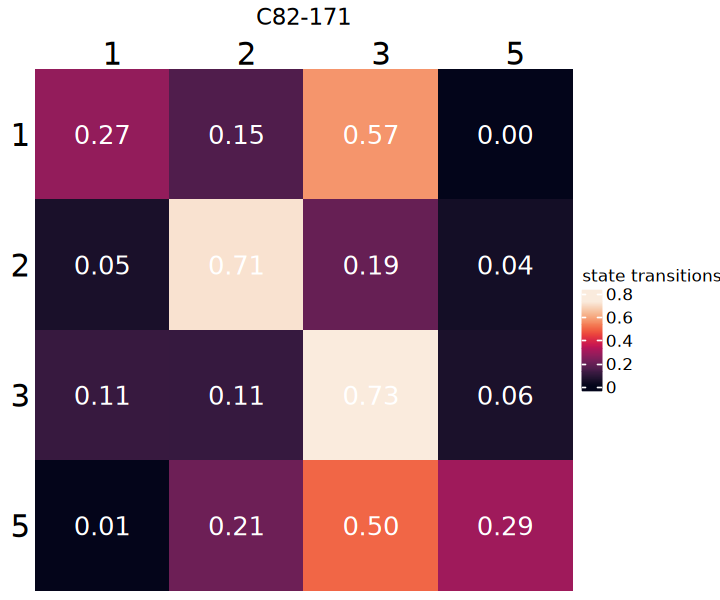

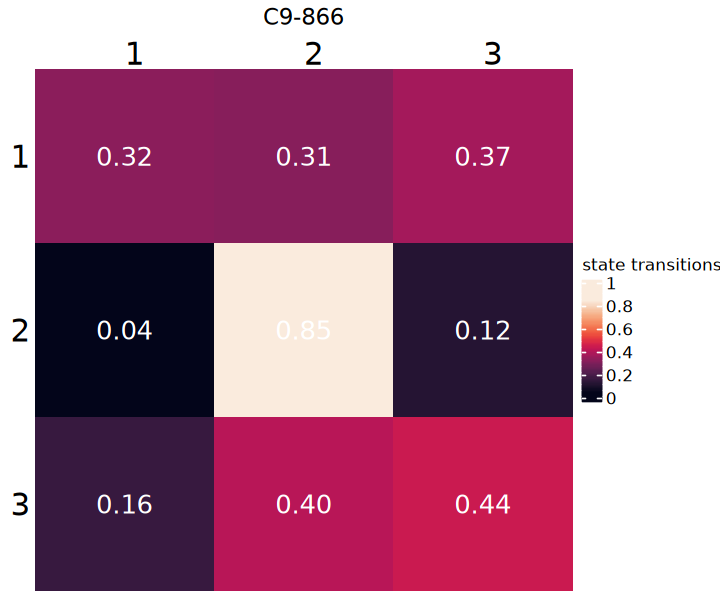

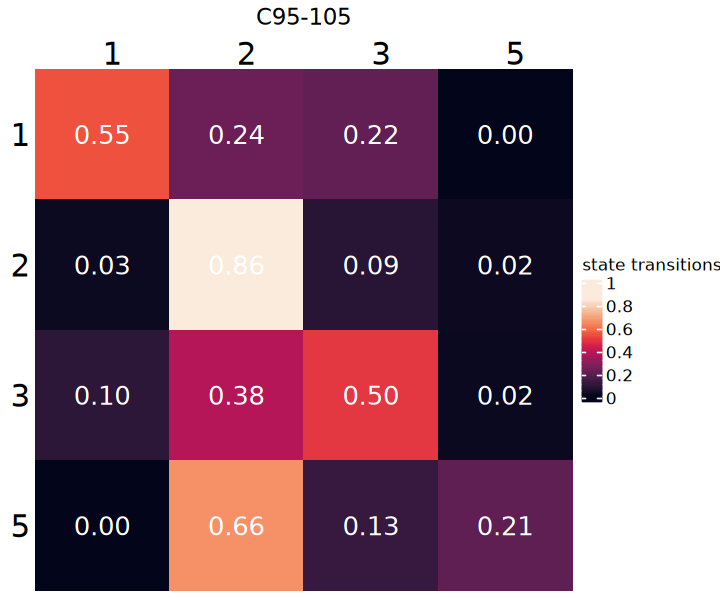

ERROR: Error in if (clone_size < 100) {: missing value where TRUE/FALSE needed


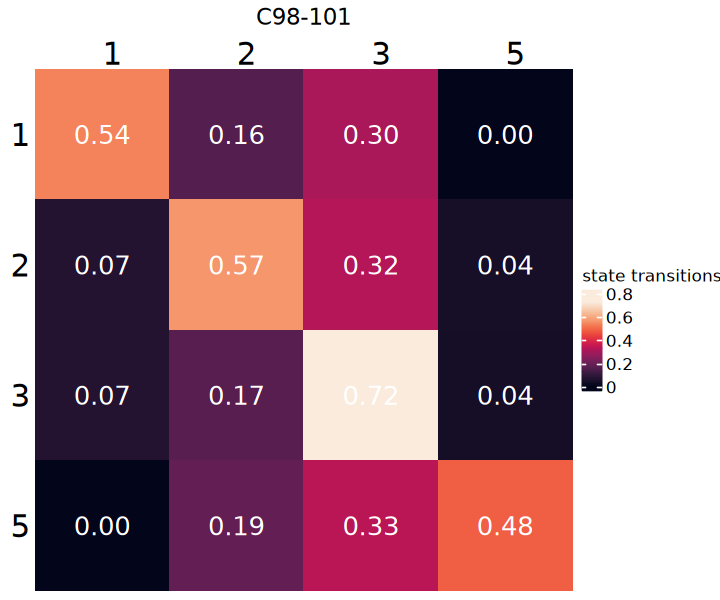

In [13]:
for (treefile in treefiles){
    clone_size <- as.numeric(gsub('.phy.treefile','',unlist(strsplit(treefile,split = '-'))[3]))
    if(clone_size < 100){
        next
    }
    file <- treefile
    lineageGrp <- paste0(unlist(strsplit(treefile,split = '-'))[2],'-',clone_size)
    tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T2_and_T3/polytomy/',file))
    tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
    #tree$edge.length <- rep(1,length(tree$edge.length)) # node length whether ==1?
    tree <- drop.tip(tree,tree$tip.label[!tree$tip.label %in% metadata$cellName])
    tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
    df <- as.data.frame(table(tree$states))
    df$ratio <- df$Freq / sum(df$Freq)
    clusters <- as.character(df[df$ratio>0.01,'Var1'])
    tree <- drop.tip(tree,tree$tip.label[!tree$states %in% clusters])
    tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
    tree$edge.length <- rep(1,length(tree$edge.length))
    #print(length(unique(tree$states)))

    if (length(unique(tree$states))!=1){
    #print(tree)
    Pinf <- PATH_inf(tree = tree, cell_states = "states", nstates = length(unique(tree$states)))

    options(repr.plot.width=6, repr.plot.height=5)
    plot <- Heatmap(Pinf$P,column_title = lineageGrp,rocket(256),
            row_names_gp = gpar(fontsize = 18, fontface = "bold"), 
            column_names_gp = gpar(fontsize = 18, fontface = "bold"),
            cluster_rows = F,cluster_columns = F,row_names_side = 'left',column_names_side = 'top',column_names_rot = 0,
            cell_fun = function(j, i, x, y, width, height, fill) {
                    grid.text(sprintf("%.2f", as.matrix(Pinf$P)[i, j]), x, y, gp = gpar(fontsize = 15,col = "white"))
                    },
            heatmap_legend_param = list(title = "state transitions")
                   )

    print(plot)
    write.table(Pinf$P,file=paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/',lineageGrp,'_cell_transition_ALL_S2_S3a.csv'),sep=',',quote=F,col.names = NA) 
    grid.newpage() 
}
}

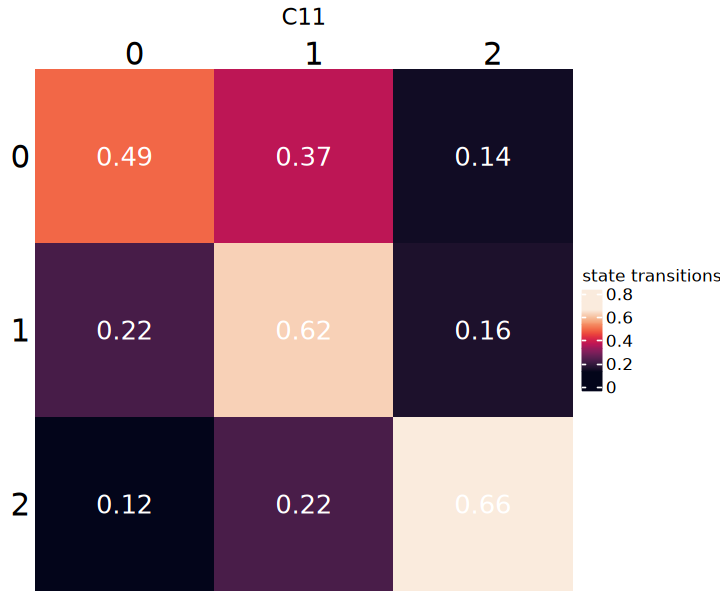

In [10]:
lineageGrp <- c('C11')
file <- 'cell_mutation_matrix-C11-400.phy.treefile'
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T2_and_T3/polytomy/',file))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
#tree$edge.length <- rep(1,length(tree$edge.length)) # node length whether ==1?
tree <- drop.tip(tree,tree$tip.label[!tree$tip.label %in% metadata$cellName])
tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
df <- as.data.frame(table(tree$states))
df$ratio <- df$Freq / sum(df$Freq)
clusters <- as.character(df[df$ratio>0.1,'Var1'])
tree <- drop.tip(tree,tree$tip.label[!tree$states %in% clusters])
tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
tree$edge.length <- rep(1,length(tree$edge.length))
#print(length(unique(tree$states)))

if (length(unique(tree$states))!=1){
#print(tree)
Pinf <- PATH_inf(tree = tree, cell_states = "states", nstates = length(unique(tree$states)))

options(repr.plot.width=6, repr.plot.height=5)
plot <- Heatmap(Pinf$P,column_title = lineageGrp,rocket(256),
        row_names_gp = gpar(fontsize = 18, fontface = "bold"), 
        column_names_gp = gpar(fontsize = 18, fontface = "bold"),
        cluster_rows = F,cluster_columns = F,row_names_side = 'left',column_names_side = 'top',column_names_rot = 0,
        cell_fun = function(j, i, x, y, width, height, fill) {
                grid.text(sprintf("%.2f", as.matrix(Pinf$P)[i, j]), x, y, gp = gpar(fontsize = 15,col = "white"))
                },
        heatmap_legend_param = list(title = "state transitions")
               )

print(plot)
}

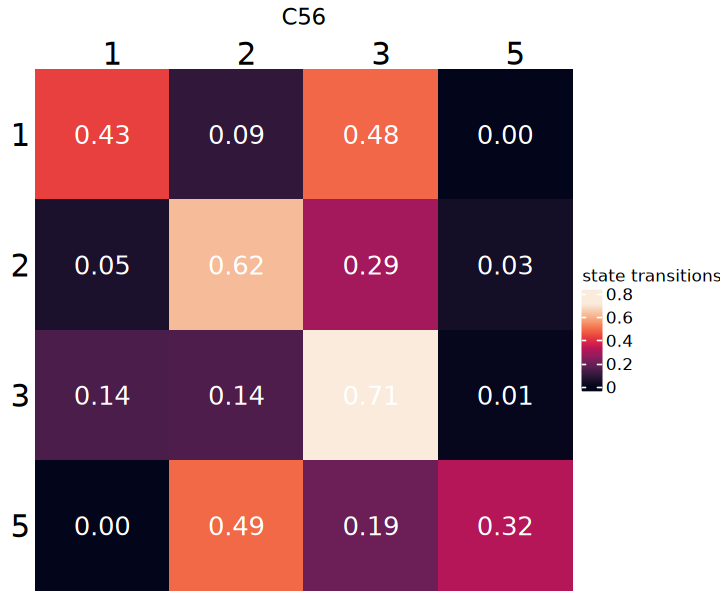

In [5]:
lineageGrp <- c('C56')
file <- 'cell_mutation_matrix-C56-60.phy.treefile'
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T2_and_T3/polytomy/',file))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
#tree$edge.length <- rep(1,length(tree$edge.length)) # node length whether ==1?
tree <- drop.tip(tree,tree$tip.label[!tree$tip.label %in% metadata$cellName])
tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
df <- as.data.frame(table(tree$states))
df$ratio <- df$Freq / sum(df$Freq)
clusters <- as.character(df[df$ratio>0,'Var1'])
tree <- drop.tip(tree,tree$tip.label[!tree$states %in% clusters])
tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
tree$edge.length <- rep(1,length(tree$edge.length))
#print(length(unique(tree$states)))

if (length(unique(tree$states))!=1){
#print(tree)
Pinf <- PATH_inf(tree = tree, cell_states = "states", nstates = length(unique(tree$states)))

options(repr.plot.width=6, repr.plot.height=5)
plot <- Heatmap(Pinf$P,column_title = lineageGrp,rocket(256),
        row_names_gp = gpar(fontsize = 18, fontface = "bold"), 
        column_names_gp = gpar(fontsize = 18, fontface = "bold"),
        cluster_rows = F,cluster_columns = F,row_names_side = 'left',column_names_side = 'top',column_names_rot = 0,
        cell_fun = function(j, i, x, y, width, height, fill) {
                grid.text(sprintf("%.2f", as.matrix(Pinf$P)[i, j]), x, y, gp = gpar(fontsize = 15,col = "white"))
                },
        heatmap_legend_param = list(title = "state transitions")
               )

print(plot)
}

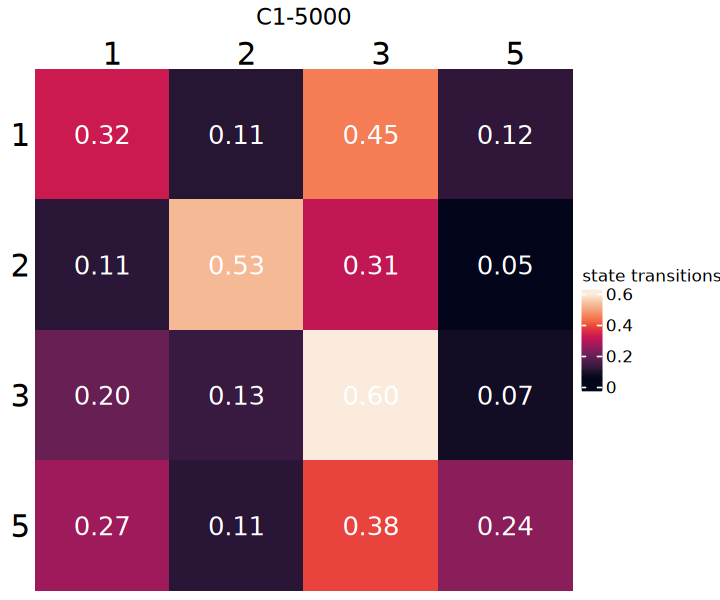

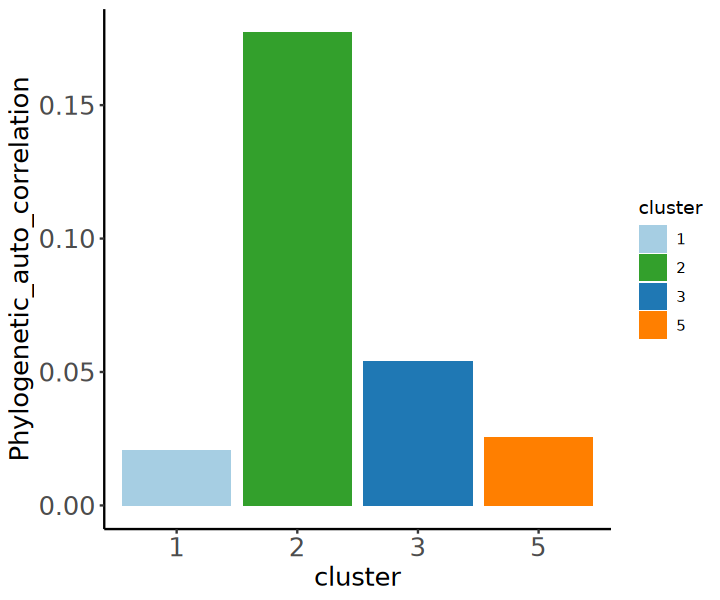

In [3]:
lineageGrp <- c('C1-5000')
file <- 'C1_downsampling5k.phy.treefile'
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T2_and_T3/polytomy/C1_downsampling5k/',file))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
#tree$edge.length <- rep(1,length(tree$edge.length)) # node length whether ==1?
tree <- drop.tip(tree,tree$tip.label[!tree$tip.label %in% metadata$cellName])
tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
df <- as.data.frame(table(tree$states))
df$ratio <- df$Freq / sum(df$Freq)
clusters <- as.character(df[df$ratio>0.013,'Var1'])
tree <- drop.tip(tree,tree$tip.label[!tree$states %in% clusters])
tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
tree$edge.length <- rep(1,length(tree$edge.length))
#print(length(unique(tree$states)))

if (length(unique(tree$states))!=1){
#print(tree)
Pinf <- PATH_inf(tree = tree, cell_states = "states", nstates = length(unique(tree$states)))

options(repr.plot.width=6, repr.plot.height=5)
plot <- Heatmap(Pinf$P,column_title = lineageGrp,rocket(256),
        row_names_gp = gpar(fontsize = 18, fontface = "bold"), 
        column_names_gp = gpar(fontsize = 18, fontface = "bold"),
        cluster_rows = F,cluster_columns = F,row_names_side = 'left',column_names_side = 'top',column_names_rot = 0,
        cell_fun = function(j, i, x, y, width, height, fill) {
                grid.text(sprintf("%.2f", as.matrix(Pinf$P)[i, j]), x, y, gp = gpar(fontsize = 15,col = "white"))
                },
        heatmap_legend_param = list(title = "state transitions")
               )

print(plot)
#write.table(Pinf$P,file=paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/',lineageGrp,'_cell_transition_ALL_S2_S3a.csv'),sep=',',quote=F,col.names = NA)        

W <- one_node_tree_dist(tree)
X <- catMat(tree$states)
xcor <- xcor(X, W)
df <- as.data.frame(diag(xcor$phy_cor))
colnames(df) <- 'Phylogenetic_auto_correlation'
df$cluster <- as.character(rownames(df))
plot <- ggplot(df, aes(x = cluster, y = Phylogenetic_auto_correlation, fill = cluster)) +
  geom_bar(stat = 'identity') +
  scale_fill_manual(values = c('0' = '#6a3d9a',
                               '1' = '#a6cee3',
                               '2' = '#33a02c',
                               '3' = '#1f78b4',
                               '4' = '#fb9a99',
                               '5' = '#ff7f00',
                               '6' = '#fdbf6f',
                               '7' = '#e31a1c',
                               '8' = '#cab2d6'))+ theme_classic()+
        theme(axis.text = element_text(size = 15),axis.title = element_text(size = 15)) 
print(plot)
write.table(Pinf$P,file=paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_transition/',lineageGrp,'_cell_transition_ALL_S2_S3a.csv'),sep=',',quote=F,col.names = NA) 

grid.newpage()      
}
    

#dev.off()

In [3]:
pdf(paste0('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3/transition_heatmap.pdf'),width=6, height=5)
treefiles <- c('cell_mutation_matrix-C3-3297.phy.treefile','cell_mutation_matrix-C13-636.phy.treefile')
for (treefile in treefiles){
    clone_size <- as.numeric(gsub('.phy.treefile','',unlist(strsplit(treefile,split = '-'))[3]))
    if(clone_size < 100){
        next
    }
    file <- treefile
    lineageGrp <- paste0(unlist(strsplit(treefile,split = '-'))[2],'-',clone_size)
    tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/merge_all_experiments/T2_and_T3/polytomy/',file))
    tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
    #tree$edge.length <- rep(1,length(tree$edge.length)) # node length whether ==1?
    tree <- drop.tip(tree,tree$tip.label[!tree$tip.label %in% metadata$cellName])
    tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
    df <- as.data.frame(table(tree$states))
    df$ratio <- df$Freq / sum(df$Freq)
    clusters <- as.character(df[df$ratio>0.01,'Var1'])
    tree <- drop.tip(tree,tree$tip.label[!tree$states %in% clusters])
    tree$states <- paste0(as.character(metadata[tree$tip.label,'seurat_clusters_rename']))
    tree$edge.length <- rep(1,length(tree$edge.length))
    #print(length(unique(tree$states)))

    if (length(unique(tree$states))!=1){
    #print(tree)
    Pinf <- PATH_inf(tree = tree, cell_states = "states", nstates = length(unique(tree$states)))

    options(repr.plot.width=6, repr.plot.height=5)
    plot <- Heatmap(Pinf$P,column_title = lineageGrp,rocket(256),
            row_names_gp = gpar(fontsize = 18, fontface = "bold"), 
            column_names_gp = gpar(fontsize = 18, fontface = "bold"),
            cluster_rows = F,cluster_columns = F,row_names_side = 'left',column_names_side = 'top',column_names_rot = 0,
            cell_fun = function(j, i, x, y, width, height, fill) {
                    grid.text(sprintf("%.2f", as.matrix(Pinf$P)[i, j]), x, y, gp = gpar(fontsize = 15,col = "white"))
                    },
            heatmap_legend_param = list(title = "state transitions")
                   )

    print(plot)
        
    W <- one_node_tree_dist(tree)
    X <- catMat(tree$states)
    xcor <- xcor(X, W)
    df <- as.data.frame(diag(xcor$Z.score))
    colnames(df) <- 'Phylogenetic_auto_correlation'
    df$cluster <- as.character(rownames(df))
    plot <- ggplot(df, aes(x = cluster, y = Phylogenetic_auto_correlation, fill = cluster)) +
      geom_bar(stat = 'identity') + ylab('Phylogenetic correlation (Z score)') +
      scale_fill_manual(values = c(
                                   '1' = '#a6cee3',
                                   '2' = '#54278f',
                                   '3' = '#e7298a',
                                   '4' = '#1f77b4',
                                   '5' = '#ff6600'))+ theme_classic()+
            theme(axis.text = element_text(size = 15),axis.title = element_text(size = 15)) + ggtitle(unlist(strsplit(treefile,split = '-'))[2])
    print(plot)
        
     grid.newpage() 
}
}
dev.off()

png 
  2